<a href="https://www.kaggle.com/code/lostinworlds/eda-air-traffic-landings-statistics?scriptVersionId=98711025" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Author's comment: If you liked my work, please dont forget to upvote.*


# Introduction 
Working in the aviation supply chain, various aspects of aviation and air traffic can, not only be fascinating but also be impactful on those operating within the sector. A plethora of organisations offer data  on Air traffic which can cover information from passenger numbers to the types of aircraft passing through the a specific airport. 

Once such dataset is the Air traffic landing data from the San Francisco International Airport (SFO) data on Landings Statistics issued via City and County of San Francisco. The dataset covers a number of various factors including 
* Activity Period
* Operating Airline
* Published Airline
* GEO Summary
* GEO Region
* Landing Aircraft Type
* Aircraft Body Type
* Aircraft Manufacturer
* Aircraft Model
* Aircraft Version
* Landing Count
* Total Landed Weight

Subsequently, this project will explore the data with the aim of ascertain information about the preference of certain aircrafts for specific routes and the prominence of various aircraft manufactures.

# Overview

In [1]:
#Libraries for handling data 
import numpy as np 
import pandas as pd

# library specific to kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# library for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# turn off warning
pd.set_option('mode.chained_assignment', None)

/kaggle/input/sf-air-traffic-landing-statistics/Air_Traffic_Landings_Statistics.csv


The dataset consists of over 26000 entries. However, there are some missing data. Aspects such as IATA Code is not a major issue as the key information related to this variable is stored in the operating and published airline variables. 

In [2]:
# impprt data
df = pd.read_csv("/kaggle/input/sf-air-traffic-landing-statistics/Air_Traffic_Landings_Statistics.csv")

# reset "-" to null
df["Aircraft Version"].replace('-', np.nan, inplace = True)

#view data
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000


In [3]:
# view data stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26842 entries, 0 to 26841
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              26842 non-null  int64 
 1   Operating Airline            26842 non-null  object
 2   Operating Airline IATA Code  26738 non-null  object
 3   Published Airline            26842 non-null  object
 4   Published Airline IATA Code  26738 non-null  object
 5   GEO Summary                  26842 non-null  object
 6   GEO Region                   26842 non-null  object
 7   Landing Aircraft Type        26842 non-null  object
 8   Aircraft Body Type           26842 non-null  object
 9   Aircraft Manufacturer        26825 non-null  object
 10  Aircraft Model               26842 non-null  object
 11  Aircraft Version             13952 non-null  object
 12  Landing Count                26842 non-null  int64 
 13  Total Landed Weight          26

As for Aircraft version, options to retrieve the data may be limited. It may be that for some aircraft there is simply no version. 

In [4]:
# view null values
df.isnull().sum().reset_index(name = "Null values").set_index("index")

,Null values
index,
Activity Period,0
Operating Airline,0
Operating Airline IATA Code,104
Published Airline,0
Published Airline IATA Code,104
GEO Summary,0
GEO Region,0
Landing Aircraft Type,0
Aircraft Body Type,0


The dataset covers the period between 2005 and 2021.

In [5]:
print("No. of aircaft versions provided is {}.".format(df["Aircraft Version"].nunique()))

No. of aircaft versions provided is 89.


Furthermore, based on total landed weight, it appears that there has bene some fluctuations in the data. Regardless, information for 89 aircraft versions is provided in this dataset, with some version extremely popular compared to others. 

In [6]:
df["Aircraft Version"].value_counts().rename_axis("Aircraft Version").reset_index(name = "count").set_index("Aircraft Version").head()

,count
Aircraft Version,
400,1663
300,1383
800,1151
200,1048
700,1028


In [7]:
# reset activity period to a datetime. 
df["Activity Period"] = pd.to_datetime(df["Activity Period"], format = "%Y%m")

# establish year variable
df["Year"] =df["Activity Period"].dt.year

# print date range
print("This dataset covers the years from", df["Year"].min(),"to {}.".format(df["Year"].max()))

This dataset covers the years from 2005 to 2021.


In [8]:
# drop IATA code variables 
df.drop(["Operating Airline IATA Code", "Published Airline IATA Code"], axis = 1, inplace = True)

# Trends 
Below is a graph of how the total weight of passenger, freighter and combi flights have changed over the 16 years. 

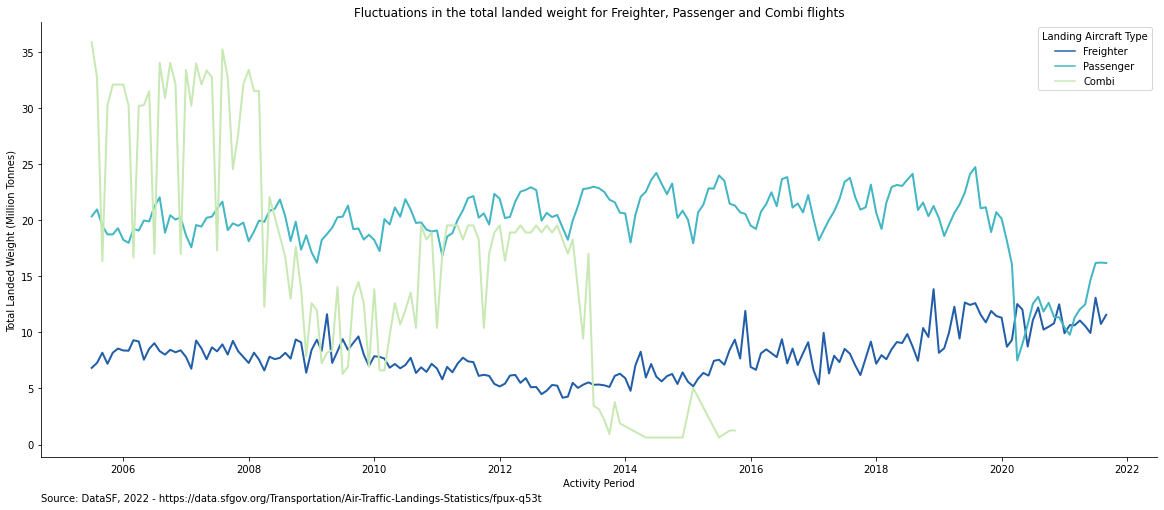

In [9]:
# establish new total landed weight variable with units adjusted
df["Total Landed Weight (Million Tonnes)"] = df["Total Landed Weight"]/1000000

#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df, 
             hue ="Landing Aircraft Type", ci = None, palette = "YlGnBu_r", lw=2)

# modify graph
plt.title("Fluctuations in the total landed weight for Freighter, Passenger and Combi flights")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

Data for combination flights appear to disappear from 2015. As commercial flights can carry cargo, it may be a change in classification. However, based solely on this data, this inference cannot be validated. 

The landed weight also highlights the impact of COVID which appear to have affected passenger flights disproportionally. Cargo (freighter) flights appear to have be stable with the pattern of growth from 2015 onwards appearing to be relatively unchanged. Resampling the data so as to ascertain the yearly average total landed weight. this highlights the impact of COVID in greater clarity. This graph also indicates that contrary to first observation COVID did impact freight as the growth between 2017 and 2019 appear to have been damped. presumably due to factory closures due to lockdowns.

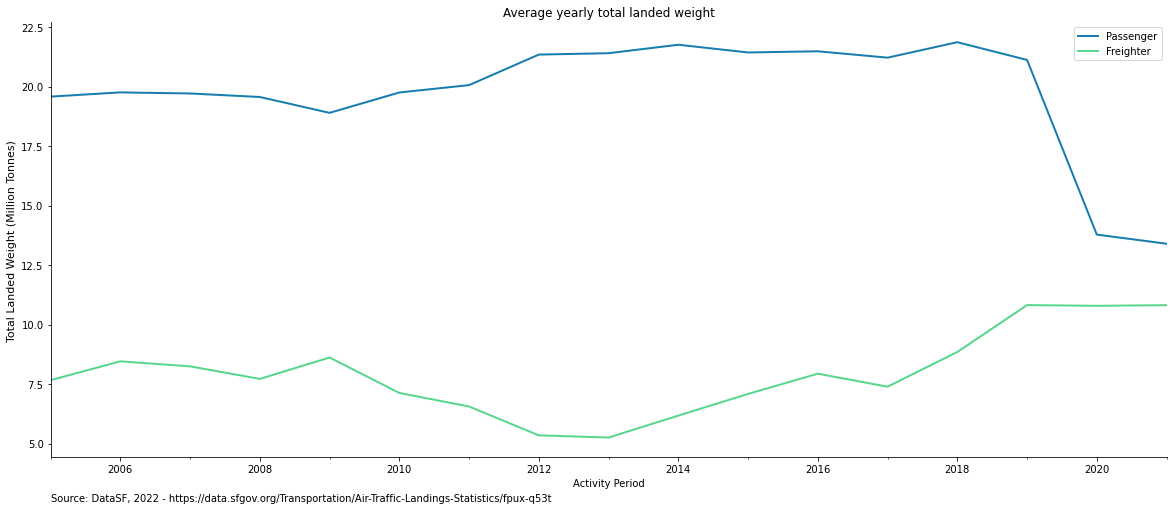

In [10]:
#create copy of dataset
df_1 = df.copy()

#revise shape of dataset to enable resampling based on time
df_1P = df_1[df_1["Landing Aircraft Type"]== "Passenger"][["Activity Period","Total Landed Weight (Million Tonnes)"]]
df_1F = df_1[df_1["Landing Aircraft Type"]== "Freighter"][["Activity Period","Total Landed Weight (Million Tonnes)"]]

df_1P.set_index("Activity Period", inplace = True)
df_1F.set_index("Activity Period", inplace = True)


#create graph
plt.figure(figsize = (20,8))
df_1P["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot.line(label = "Passenger", color =  "#177DAE", lw=2).legend(loc='upper right')

df_1F["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot(label = "Freighter", color = "#58D68D",lw=2).legend(loc='upper right')


#modified graph
plt.title("Average yearly total landed weight")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)

plt.show()

A 3 month rolling average figures also indicate the seasonality of passenger travel, though for freight this pattern is less pronounced with more fluctuations. Also there are major spikes in the landed weigh of fright flights very few years. 

In [11]:
# establish new 3 monthly moving average
df_1PM = df_1P["Total Landed Weight (Million Tonnes)"].resample(rule="M").mean().reset_index(name = "Avg Weight").set_index("Activity Period")
df_1FM = df_1F["Total Landed Weight (Million Tonnes)"].resample(rule="M").mean().reset_index(name = "Avg Weight").set_index("Activity Period")

df_1PM["3ms moving avg"] = df_1PM["Avg Weight"].rolling(window=3).mean()
df_1FM["3ms moving avg"] = df_1FM["Avg Weight"].rolling(window=3).mean()

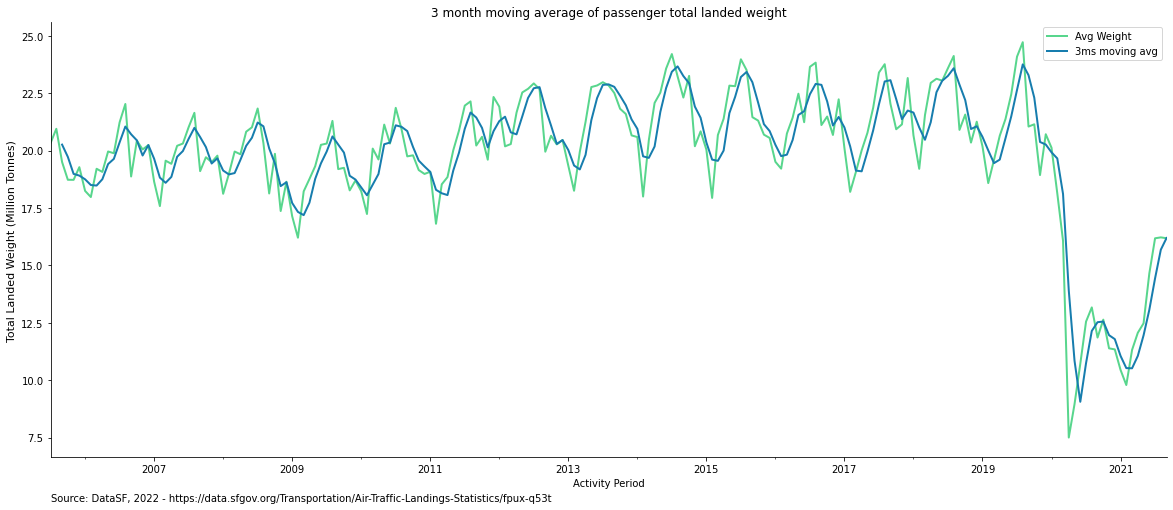

In [12]:
#create graph
df_1PM[["Avg Weight","3ms moving avg"]].plot.line(figsize = (20,8), color = ["#58D68D", "#177DAE"],
                                                  title = "3 month moving average of passenger total landed weight", 
                                                  lw=2).legend(loc='upper right');

#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)

plt.show()

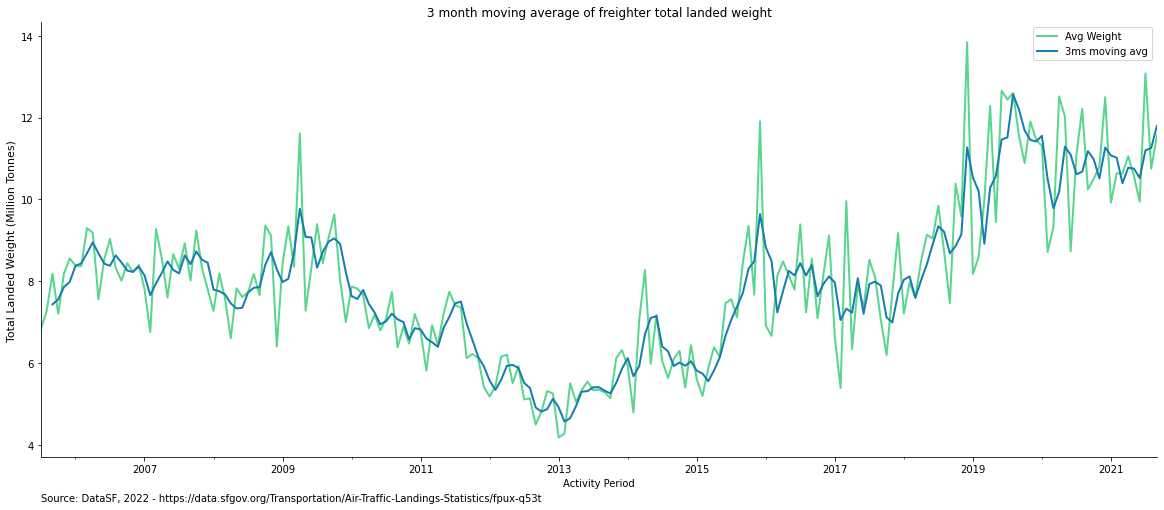

In [13]:
#create graph
df_1FM[["Avg Weight","3ms moving avg"]].plot.line(figsize = (20,8), title = "3 month moving average of freighter total landed weight", 
                                                  color = ["#58D68D", "#177DAE"], lw=2).legend(loc='upper right');

#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)

plt.show()

Examining the trends of total landed weight, with respect to aircraft type also indicates interesting patterns. Narrow bodies have steady increased in popularity since 2006. However, it was significantly affected by COVID and even in 2021/2022, appears to have regained its popularity.

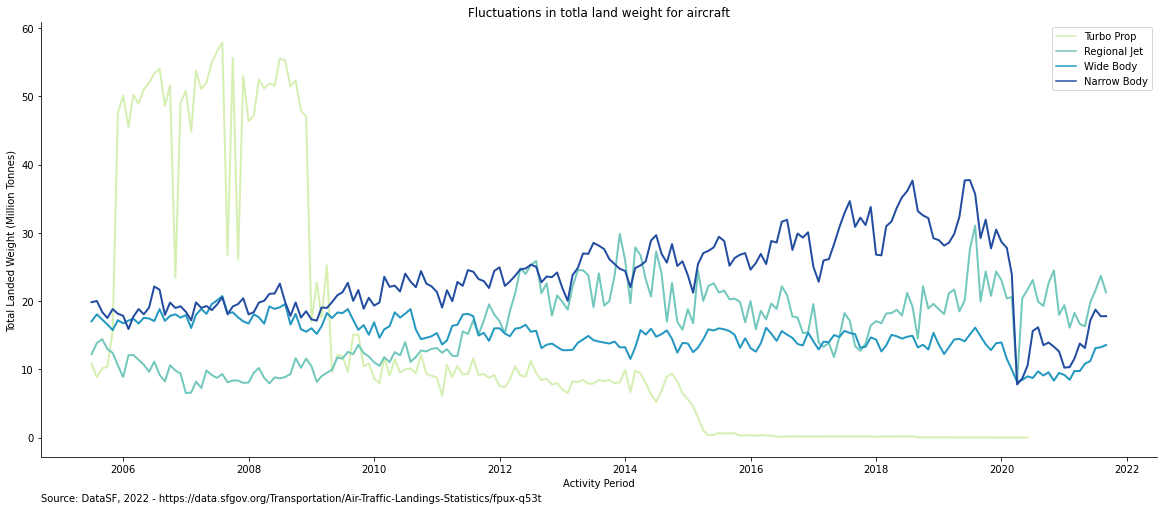

In [14]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df, hue ="Aircraft Body Type", ci = None,
             palette = "YlGnBu",  hue_order = ["Turbo Prop", "Regional Jet",  "Wide Body", "Narrow Body"], lw=2 )

#modified graph
plt.title("Fluctuations in totla land weight for aircraft")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.legend(loc='upper right')
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

On the other hand, wide body plans appear to have decreased in popularity over the years but it was the least affected by COVID. Wide body planes also appear to have received to pre-COVID  levels in  2021/2022. COVID impact was  narrow body planes appear to have a higher total landed weight.

Regional Jets appear to have disappeared from the dataset since 2015. This could be for a number of factors including the SFO no longer accepting such aircraft or they were decommissioned. 

Lastly the prominence of Turbo Prop appear to be have peaked in 2014. since then it has had some fluctuations and similar to narrow body planes were significantly affected by COVID. However it has since recovered to pre-COVID levels. 


The trends in aircraft type for passenger flights very much mirrors the overall trends. 

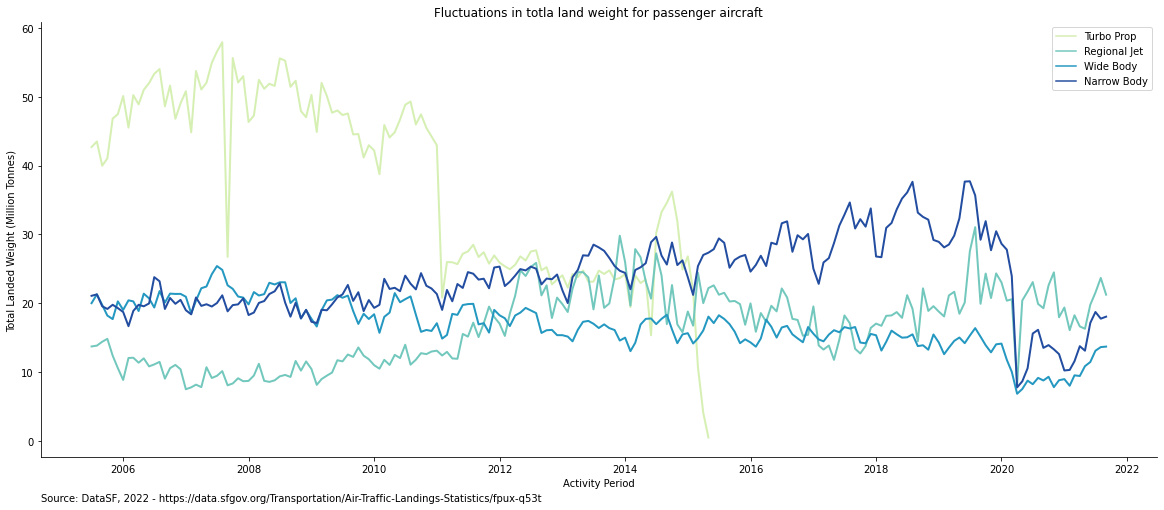

In [15]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df[df["Landing Aircraft Type"]=="Passenger"], hue ="Aircraft Body Type", 
             ci = None, palette = "YlGnBu",  hue_order = ["Turbo Prop", "Regional Jet",  "Wide Body", "Narrow Body",], lw=2 )

#modified graph
plt.title("Fluctuations in totla land weight for passenger aircraft")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.legend(loc='upper right')
plt.show()

Alas, for freight the data is somewhat unclear as the fluctuations in aircraft type is erratic especially for narrow body planes. As for wide body, the trend is  relatively stable and highlights the growth from 2014 onwards. 

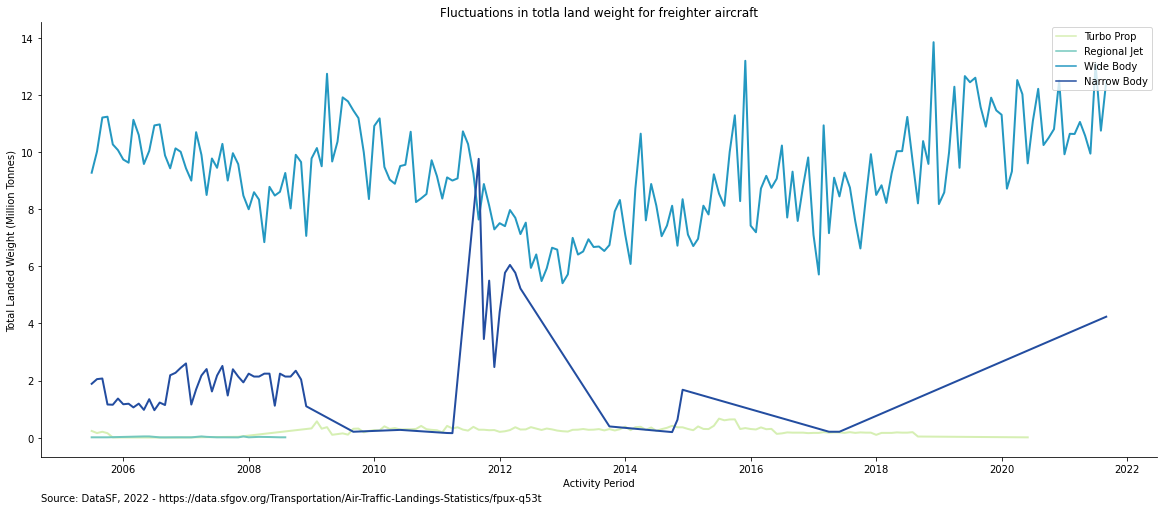

In [16]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = df[df["Landing Aircraft Type"]=="Freighter"], 
             hue ="Aircraft Body Type", ci = None, palette = "YlGnBu",  hue_order = ["Turbo Prop", "Regional Jet",  "Wide Body", "Narrow Body",], lw=2)

#modified graph
plt.title("Fluctuations in totla land weight for freighter aircraft")
sns.despine(top = True, right = True, left = False, bottom = False)

plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.legend(loc='upper right')
plt.show()

# Commercial/ Passenger flights

Commercial/ Passenger flights 
In this dataset, the majority of the data are related to passengers/commercial flights traveling both domestically and internationally. As indicated previously, commercial flights can carry some level of cargo and can be a more economical option of transporting goods. As such, the role of pure cargo flights is limited. 

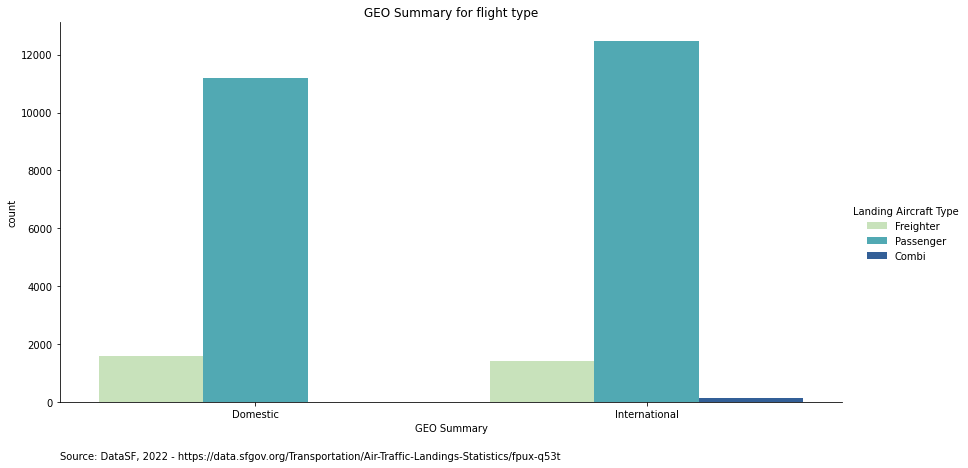

In [17]:
#create graph
sns.catplot(x = "GEO Summary", kind = "count", hue ="Landing Aircraft Type", data = df, 
            palette = "YlGnBu", height = 6, aspect = 2,)

#modified graph
plt.title("GEO Summary for flight type");
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.15), xycoords ='axes fraction' )

plt.show()

In [18]:
df["Landing Aircraft Type"].value_counts()

Passenger    23690
Freighter     3010
Combi          142
Name: Landing Aircraft Type, dtype: int64

In [19]:
Passenger = df[df["Landing Aircraft Type"]=="Passenger"]

print("There are",Passenger["Published Airline"].nunique(),"published airlines operating for passenger flights")


There are 85 published airlines operating for passenger flights


The airline (published and operational) data are too complex to ascertain notable information on its own, with over 85 different airlines mentioned in published airlines alone. Additionally, specific airlines appear more than others who can appear as low as only once. 

In [20]:
Passenger["Published Airline"].value_counts().reset_index(name = "count").describe()

,count
count,85.000000
mean,278.705882
std,609.941641
min,1.000000
25%,18.000000
50%,98.000000
75%,287.000000
max,4348.000000


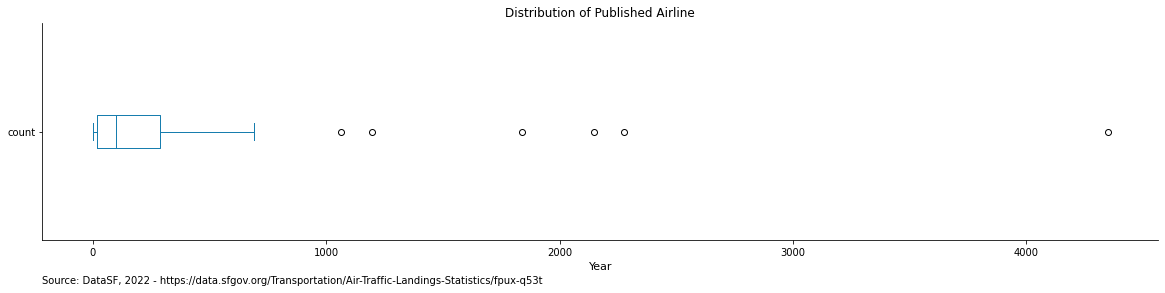

In [21]:
#create graph
Passenger["Published Airline"].value_counts().reset_index(name = "count").plot.box(figsize = (20,4), 
                                                                                   vert=False, 
                                                                                   title = "Distribution of Published Airline", color = "#177DAE")

#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.20), xycoords ='axes fraction' )
plt.xlabel("Year", fontsize=11)
plt.show()

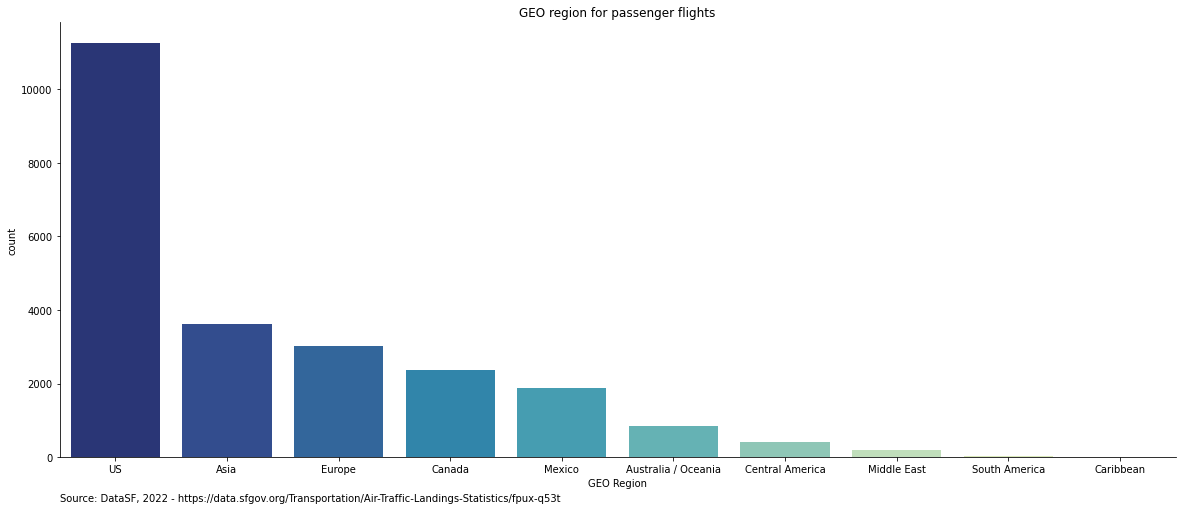

In [22]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region",  data = Passenger, palette = "YlGnBu_r", order =Passenger["GEO Region"].value_counts().index )

#modified graph
plt.title("GEO region for passenger flights")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Examining the GEO region for passenger flights , most flights appear to be domestic flights followed by those to Asia and Europe. However, it should be noted that neighbouring North American nations also appear to be prominent destinations, though they appear as individual countries whilst other regions cover a number of different nations. Updating the values so that US, Canada and Mexico appear as once variable highlights the prominence of northern American nations. 

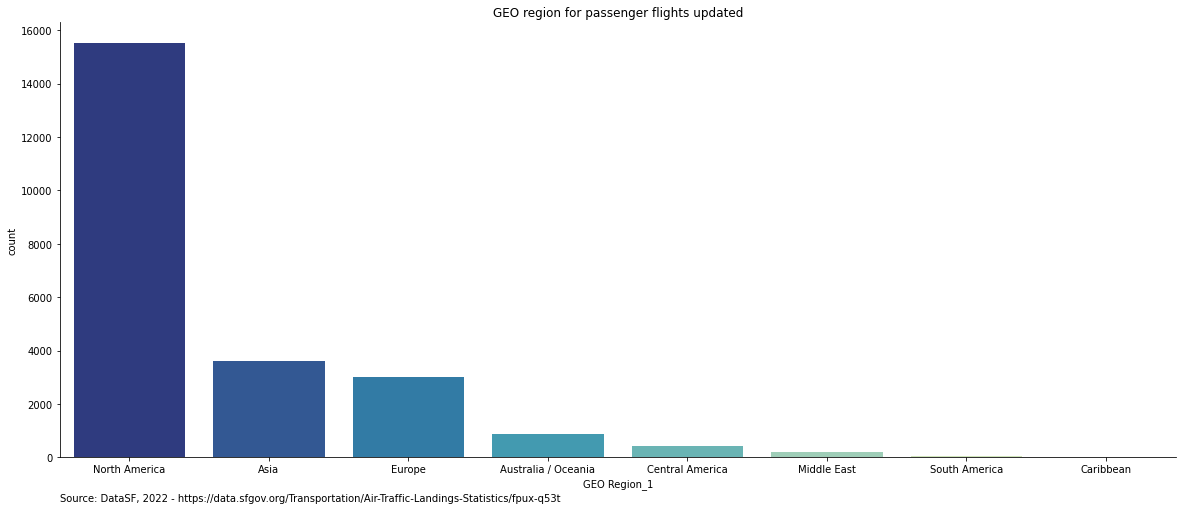

In [23]:
# establish new variable
Passenger["GEO Region_1"] = Passenger["GEO Region"].replace(["Canada", "Mexico", "US"], "North America", )

#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1",  data = Passenger, palette = "YlGnBu_r", order =Passenger["GEO Region_1"].value_counts().index )

#modified graph
plt.title("GEO region for passenger flights updated")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

The location is significant as specific aircrafts are designed to cover different journeys . For example "Widebodies are exceptionally common on long-haul flights" and  whilst narrow body planes can service long hauls they "are smaller"  ([Singh, 2019](https://simpleflying.com/narrowbody-vs-widebody/)) . Therefore based upon this, one assumption may be that for passenger flights narrow body planes may be common. 

This is supported in the following graphic which illustrates the dominance of narrow body planes for passenger flights. However, the difference between narrow body and wide body is not as large as could be expected.  

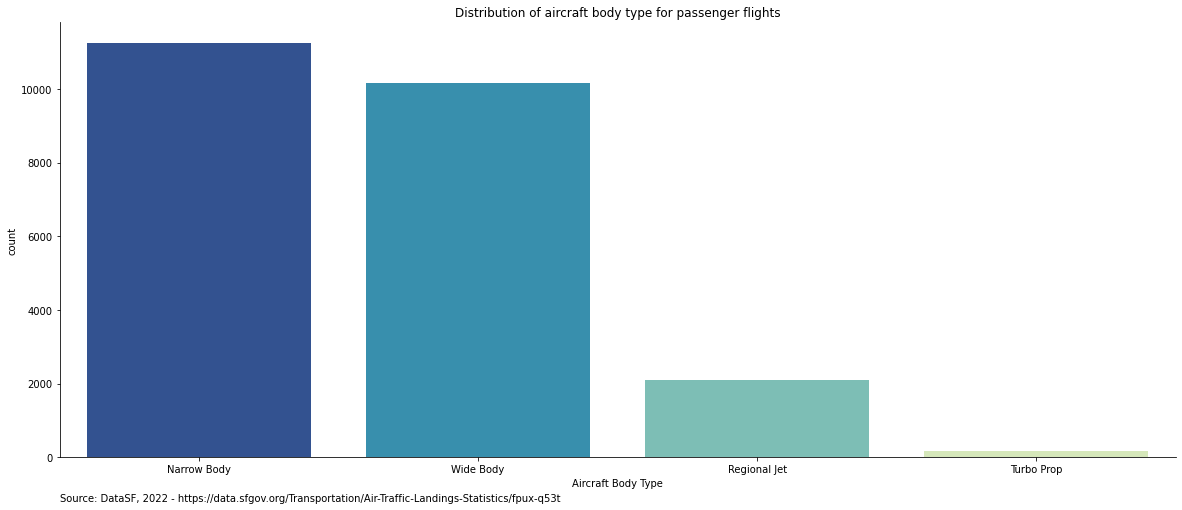

In [24]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Body Type", data = Passenger, palette = "YlGnBu_r")

#modified graph
plt.title("Distribution of aircraft body type for passenger flights")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Reviewing the distribution of the aircraft type and GEO region, shows that for North America, the data favours narrow body flights. However, for the majority of the other destinations narrow body planes are not used at all or the ratio of their usage is limited and wide body plans are the preferred/only option. 

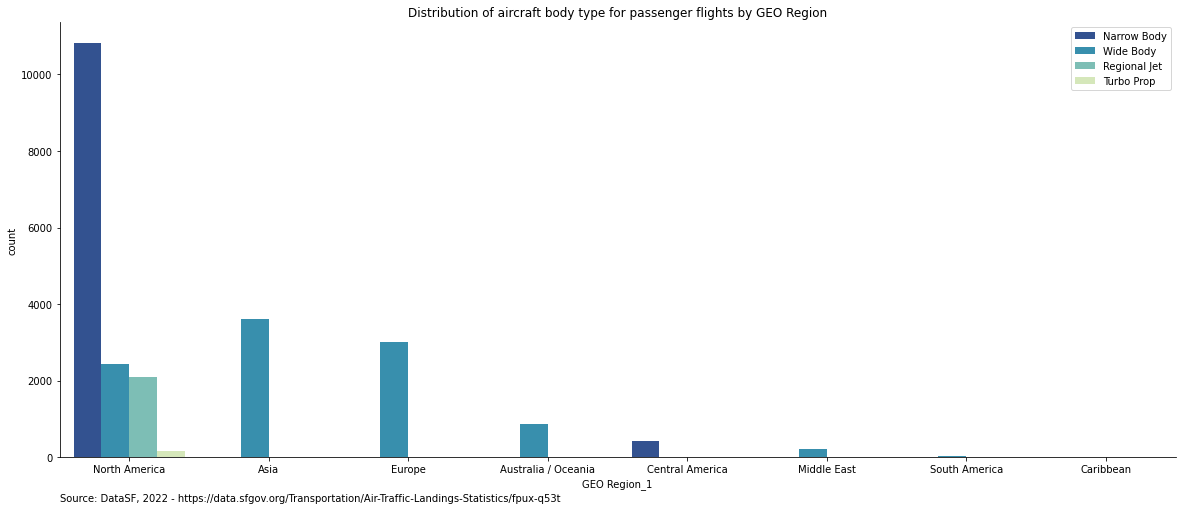

In [25]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1", hue = "Aircraft Body Type", data = Passenger, palette = "YlGnBu_r", hue_order =["Narrow Body", "Wide Body", "Regional Jet", "Turbo Prop"])

#modified graph
plt.title("Distribution of aircraft body type for passenger flights by GEO Region")
plt.legend(loc='upper right')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

However, when regions are factored, it is clear that narrow  body aircraft is a preferred choice for short haul flights such as North and Central America. However for longer distances, the wide body planes are more prominent. 

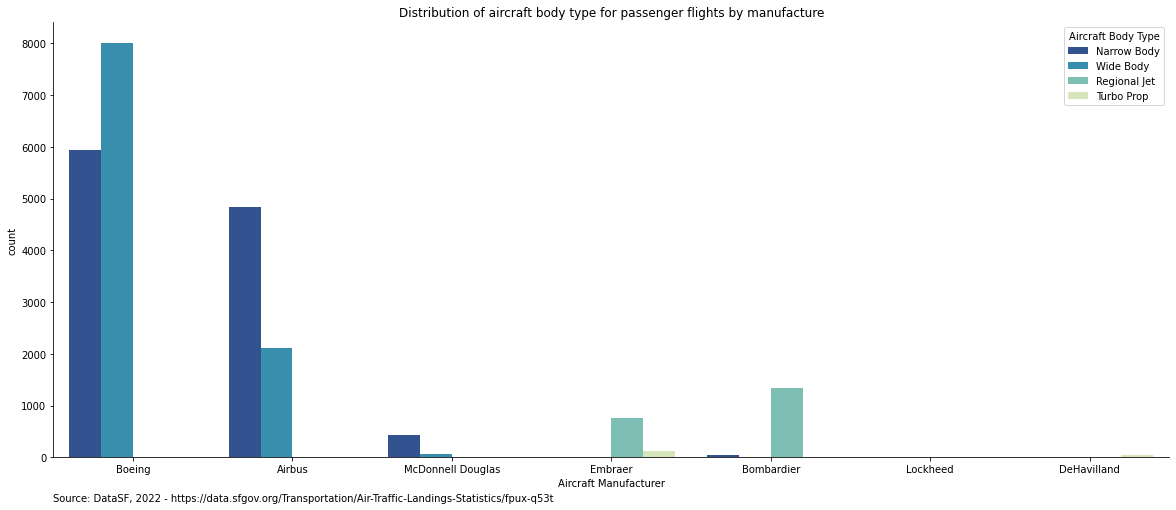

In [26]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Manufacturer", hue = "Aircraft Body Type", 
              data = Passenger, palette = "YlGnBu_r", hue_order =["Narrow Body", "Wide Body", "Regional Jet", "Turbo Prop"])

#modified graph
plt.title("Distribution of aircraft body type for passenger flights by manufacture")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

In terms of manufactures of such aircraft, the market leaders Boeing and Airbus supply the majority of the narrow and wide body planes. The number of planes by Boeing dominate the list. However, in terms of ratio of narrow body to wide body planes, Boeing appears to be a favoured choice for wide body planes whilst airbus is favoured for narrow body planes. As for Regional and Turbo Prop, they appear to be supplied by Embraer and Bombardier.

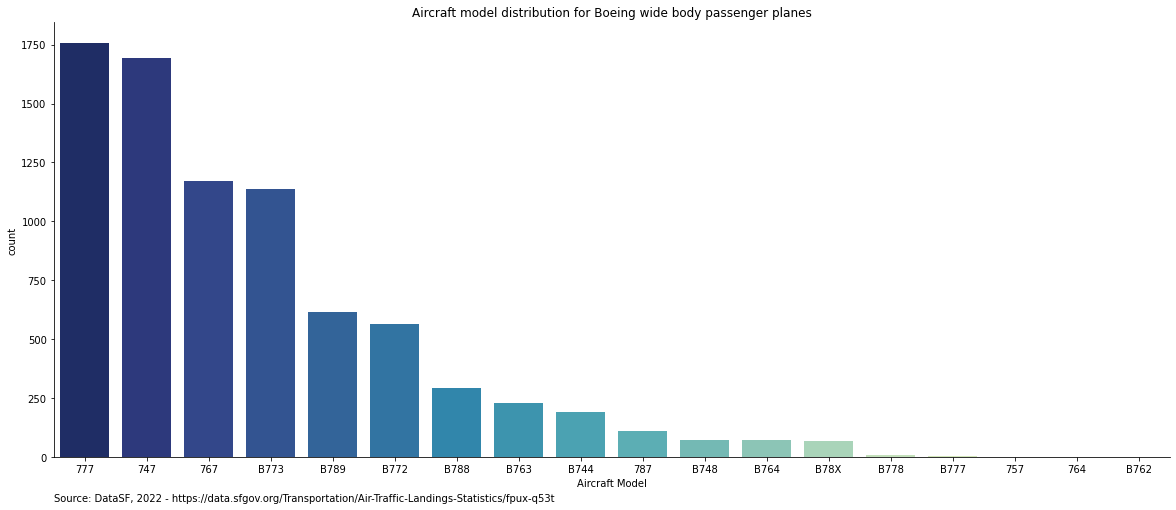

In [27]:
# establish new variables for narrow and wide body passenger planes
Passenger_Boeing_Wide = Passenger[(Passenger["Aircraft Manufacturer"]=="Boeing") &(Passenger["Aircraft Body Type"]=="Wide Body")]
Passenger_Airbus_Narrow = Passenger[(Passenger["Aircraft Manufacturer"]=="Airbus") &(Passenger["Aircraft Body Type"]=="Narrow Body")]

#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Model", data = Passenger_Boeing_Wide, order =Passenger_Boeing_Wide["Aircraft Model"].value_counts().index , palette = "YlGnBu_r")

#modified graph
plt.title("Aircraft model distribution for Boeing wide body passenger planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Boeing has a broad array of wide body plans with the 777, followed by 747 appearing to be a prominent model. 

As for Airbus, options for narrow body planes are limited to 4 types, A320, A319, A321 and A318. The Airbus A320 and A319 are the most popular types. 


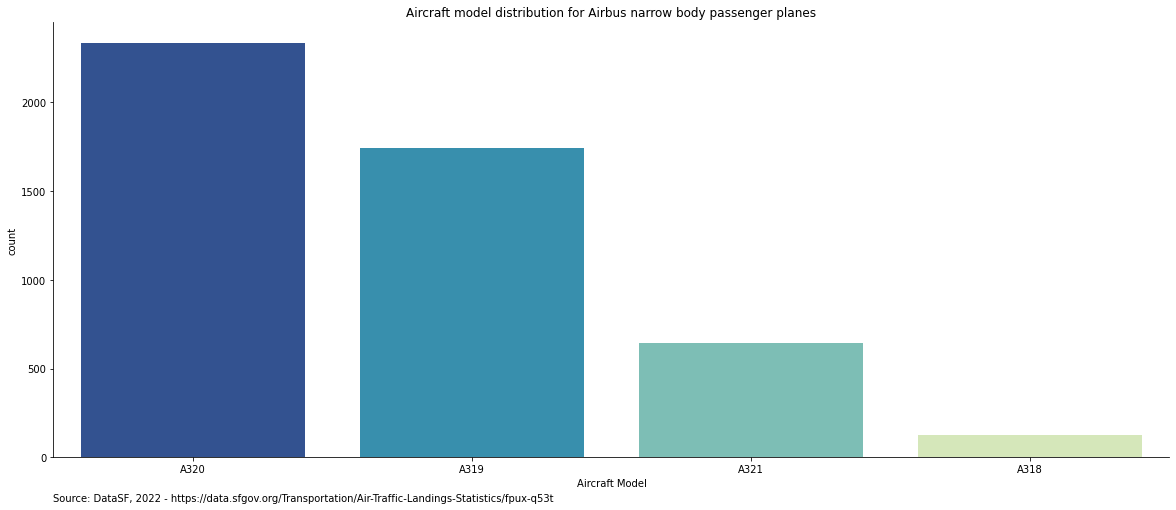

In [28]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Model", data = Passenger_Airbus_Narrow, order =Passenger_Airbus_Narrow["Aircraft Model"].value_counts().index, palette = "YlGnBu_r" )

#modified graph
plt.title("Aircraft model distribution for Airbus narrow body passenger planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Singling out the Airbus narrow body planes indicate that the A318 may no longer be in use and A319 may be phased out as it appears to be dropping in significance. A320's dominance is also emphasised in the total landed weight as it rated the highest in 2016. Alas, due to the impact of the financial downturns and the impact of COVID makes it harder to decipherer whether the A321 are gaining in momentum cover the A320s. 

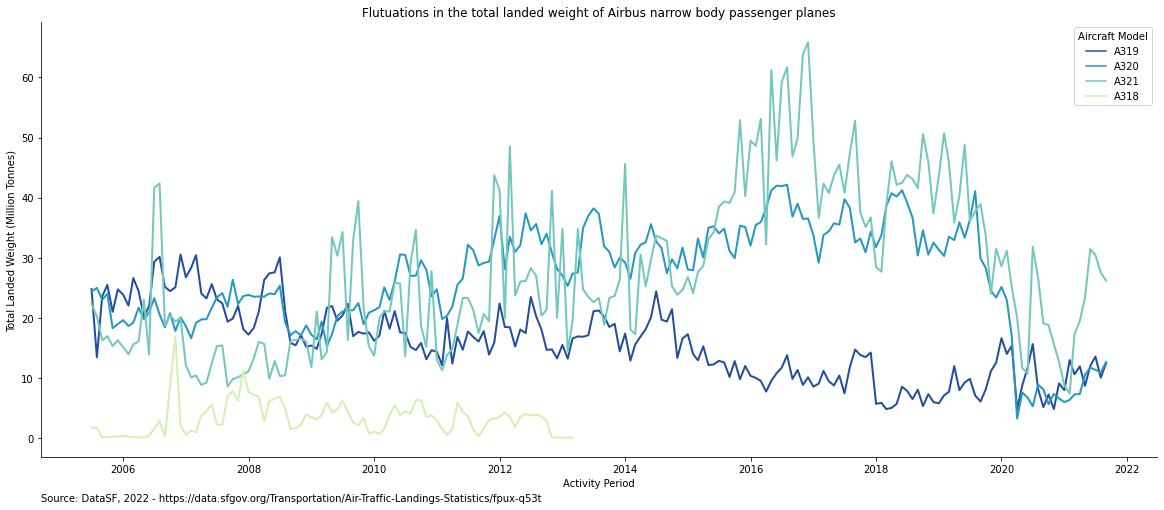

In [29]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", 
             hue = "Aircraft Model", data = Passenger_Airbus_Narrow , ci = None, palette = "YlGnBu_r", lw=2)

#modified graph
plt.title("Flutuations in the total landed weight of Airbus narrow body passenger planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Taking the yearly average total landed weights however does indicate that the newer A321 is indeed becoming the preferred model for the narrow body range for Airbus. 

In [30]:
A320 = Passenger_Airbus_Narrow[Passenger_Airbus_Narrow["Aircraft Model"]== "A320"][["Activity Period","Total Landed Weight (Million Tonnes)" ]]
A321 = Passenger_Airbus_Narrow[Passenger_Airbus_Narrow["Aircraft Model"]== "A321"][["Activity Period","Total Landed Weight (Million Tonnes)" ]]

A320.set_index("Activity Period", inplace = True)
A321.set_index("Activity Period", inplace = True)

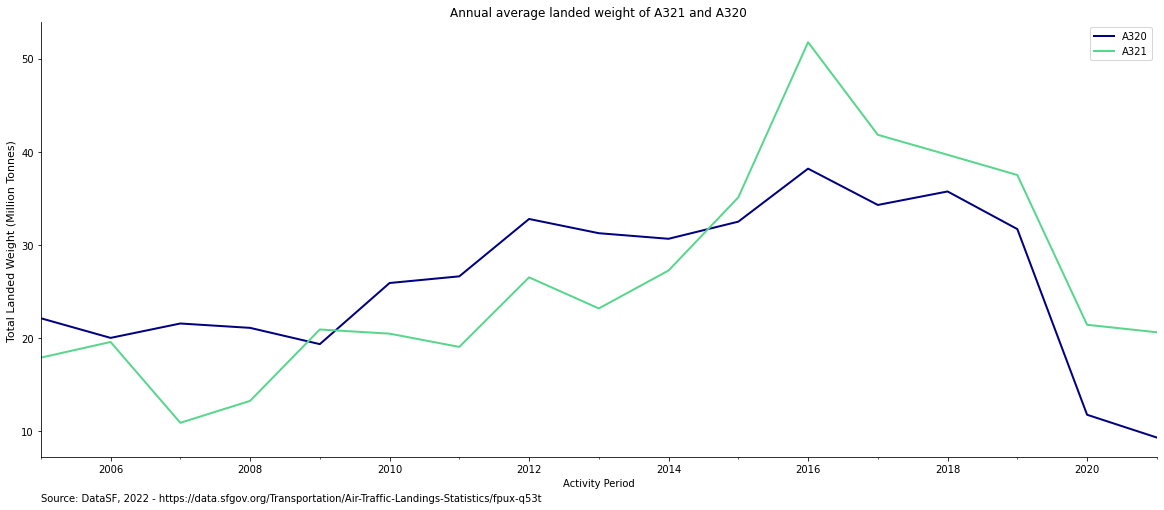

In [31]:
#create graph
A320["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot(label = "A320", figsize = (20,8), color = "navy", lw=2).legend()

A321["Total Landed Weight (Million Tonnes)"].resample(rule="A").mean().plot(label = "A321",lw=2,
                                                                            color = "#58D68D", title = "Annual average landed weight of A321 and A320").legend()

#modified graph
plt.legend(loc='upper right')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.ylabel("Total Landed Weight (Million Tonnes)", fontsize=11)
plt.show()

# Cargo / Freighter flights 

In [32]:
Freighter = df[df["Landing Aircraft Type"]=="Freighter"]

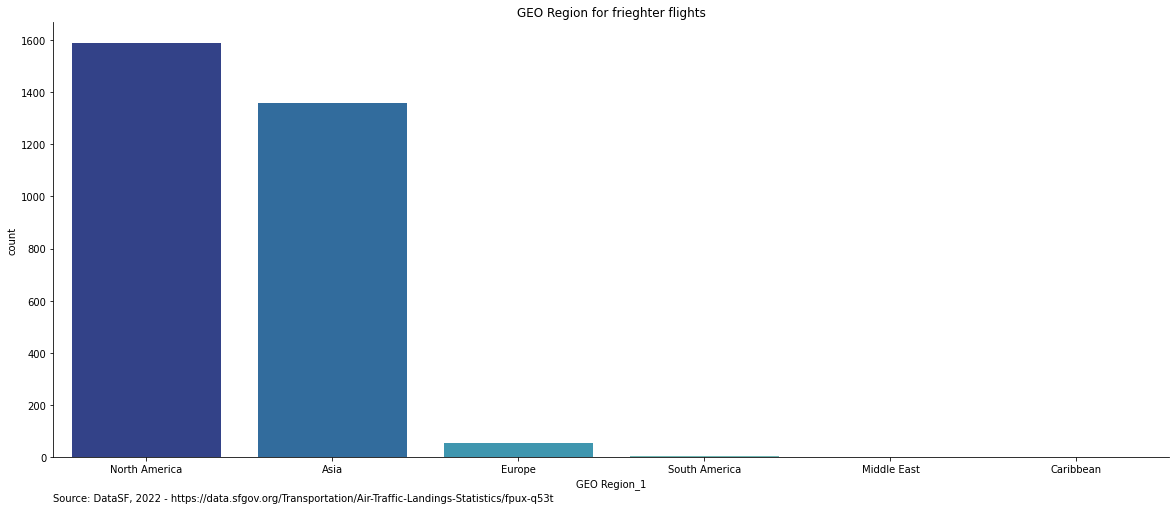

In [33]:
# new variable with US, Canada and Mexico merged
Freighter["GEO Region_1"] = Freighter["GEO Region"].replace(["Canada", "Mexico", "US"], "North America", )

#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1",  data = Freighter, palette = "YlGnBu_r", order =Freighter["GEO Region_1"].value_counts().index )

#modified graph
plt.title("GEO Region for frieghter flights")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

The GEO region for for freight flights are similar to commercial flights. North America and Asia are popular destinations. However, regions such as Australia / Oceania and central America do not appear in the list for freighter flights. This could be due to lack of trade to and from these regions but its more likely that it is simply the case that SFO does not host freighter flights for theses regions and/or the commercial flights are able to transport the necessary goods without a need for a specific freighter flight.  

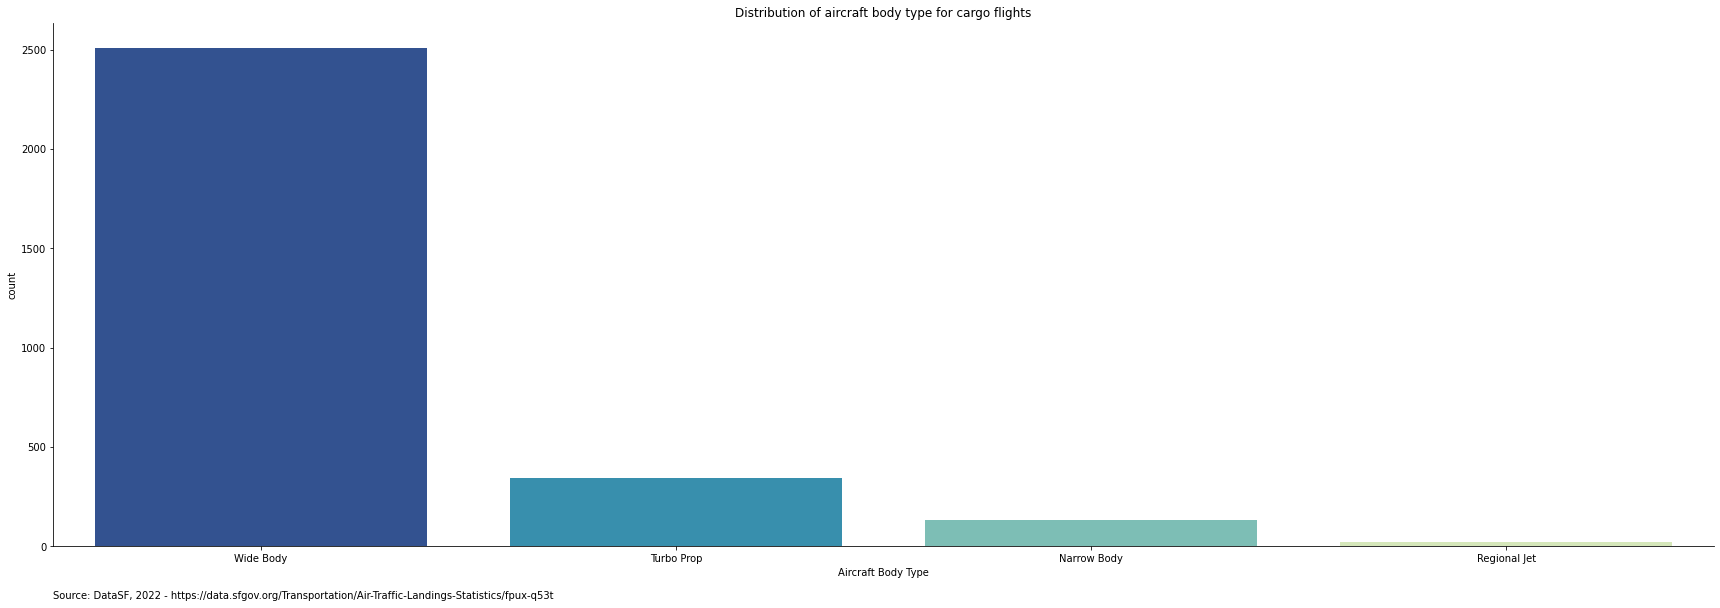

In [34]:
#create graph
sns.catplot(x ="Aircraft Body Type" , data = Freighter, kind = "count", height = 8, aspect=3, palette = "YlGnBu_r", 
            order =Freighter["Aircraft Body Type"].value_counts().index );

#modified graph
plt.title("Distribution of aircraft body type for cargo flights")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In contrast to commercial flights, cargo flights appear to consist predominantly of wide body planes. This is likely to be due to the volume of Asian flights which are greater than for commercial flights. A breakdown of the aircraft type based on destination supports this assumption. This graph also highlights that even for short haul flights, wider body planes are a preferred option.

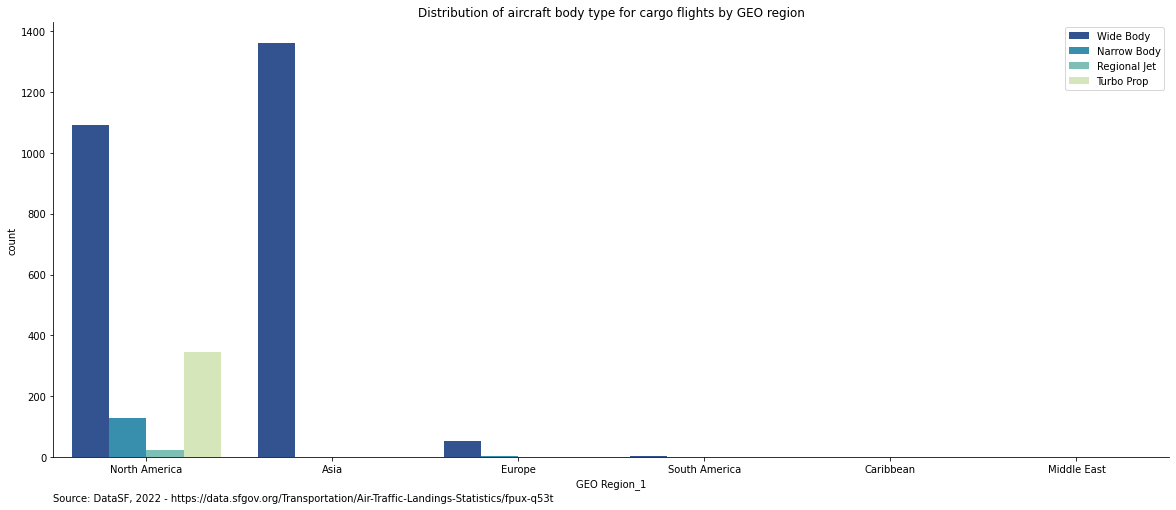

In [35]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region_1", hue = "Aircraft Body Type", data = Freighter, 
              palette = "YlGnBu_r", hue_order = ["Wide Body", "Narrow Body", "Regional Jet", "Turbo Prop"])

#modified graph
plt.title("Distribution of aircraft body type for cargo flights by GEO region")
plt.legend(loc='upper right')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

One assumption may be that the wider body planes can carry more cargo. However the previous examination of landed weight of the plane body types, it does not appear to support this claim. 

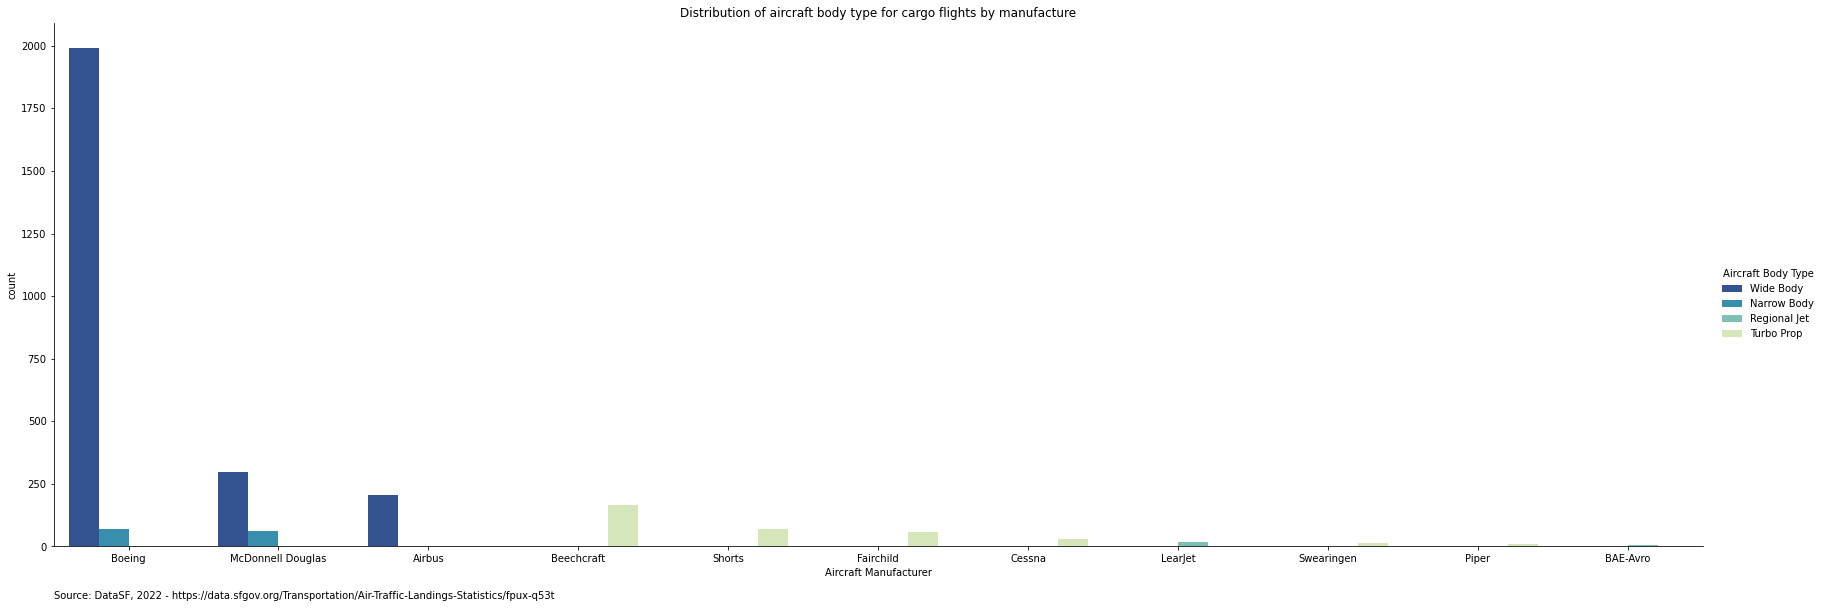

In [36]:
#create graph
sns.catplot(x ="Aircraft Manufacturer", hue="Aircraft Body Type",data = Freighter, kind = "count", height = 8, aspect=3, palette = "YlGnBu_r",
           order =Freighter["Aircraft Manufacturer"].value_counts().index, hue_order = ["Wide Body", "Narrow Body", "Regional Jet", "Turbo Prop"]);

#modified graph
plt.title("Distribution of aircraft body type for cargo flights by manufacture")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

With respect to the manufacture of the freighter planes, Boeing dominates the list for wide body planes. McDonnel Douglas and Boeing are comparative with respect to the narrow body plans for freight flights. 


In [37]:
Freight_Boeing_Wide = Freighter[(Freighter["Aircraft Manufacturer"]=="Boeing")& (Freighter["Aircraft Body Type"]=="Wide Body")]

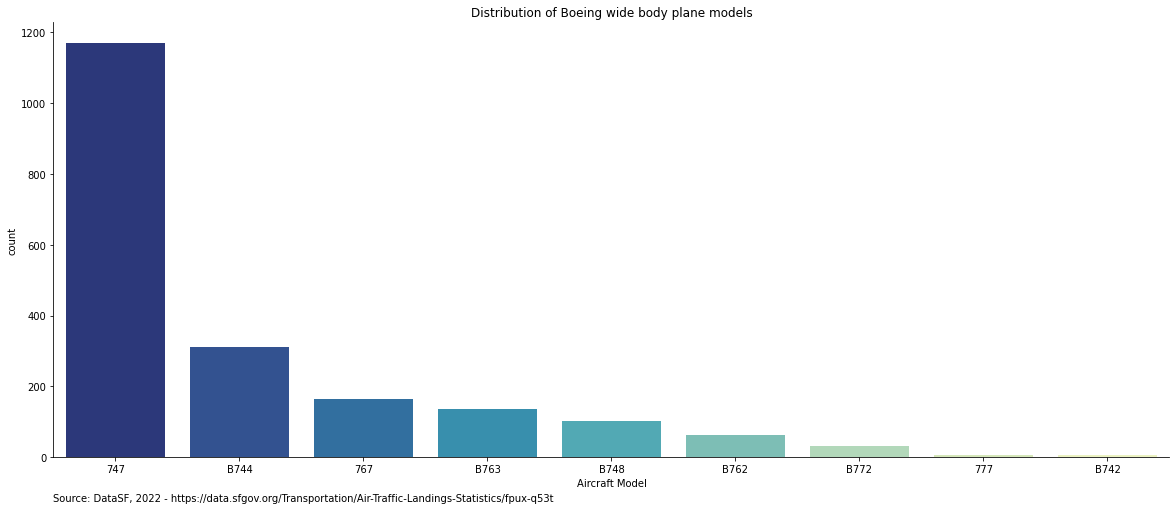

In [38]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Model", data = Freight_Boeing_Wide, order =Freight_Boeing_Wide["Aircraft Model"].value_counts().index , palette = "YlGnBu_r")

#modified graph
plt.title("Distribution of Boeing wide body plane models")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In terms of models, the preferred model for freights appear to be the 747.  It should be noted that this plan is due to go out of production from [October 2022](https://simpleflying.com/last-boeing-747-delivery-october-2022/#:~:text=Final%20delivery%20in%20October&text=%22These%20are%20the%20last%20747s,between%20May%20and%20October%202022.). Whilst planes typically operate for [20 year](https://www.thehindubusinessline.com/specials/flight-plan/what-commercial-airlines-can-do-to-extend-the-longevity-of-their-fleet/article34805181.ece#:~:text=A%20modern%20commercial%20aircraft%20costs,hours%20and%2075%2C000%20pressurisation%20cycles.)s, the data may begin to change going forward as newer models gain more prominence. 

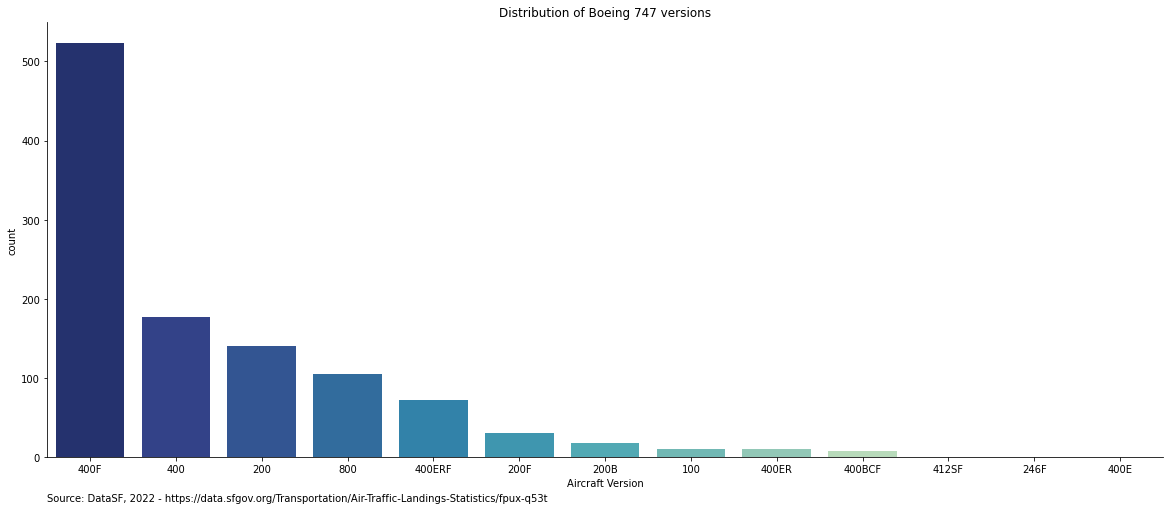

In [39]:
#create graph
plt.figure(figsize = (20,8))

sns.countplot(x ='Aircraft Version',  data = Freight_Boeing_Wide[Freight_Boeing_Wide["Aircraft Model"]=="747"], 
              order =Freight_Boeing_Wide[Freight_Boeing_Wide["Aircraft Model"]=="747"]['Aircraft Version'].value_counts().index, 
             palette = "YlGnBu_r")

#modified graph
plt.title("Distribution of Boeing 747 versions")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

Finally, whilst there are a number of missing information for aircraft version, based on the information provided the Boeing 747 version 400F appears to be the most dominant. 

Sources indicate that this is [model is a specifically designed as a freighter](https://www.aerospace-technology.com/projects/boeing747-400f/) where as the general 400 could be used for both commercial and cargo flights. Further investigation. reveals that this 747-400F is no longer active as the data for the planes end in 2016. 

In [40]:
Boeing_747_400F = Freight_Boeing_Wide[(Freight_Boeing_Wide['Aircraft Model']=="747")]

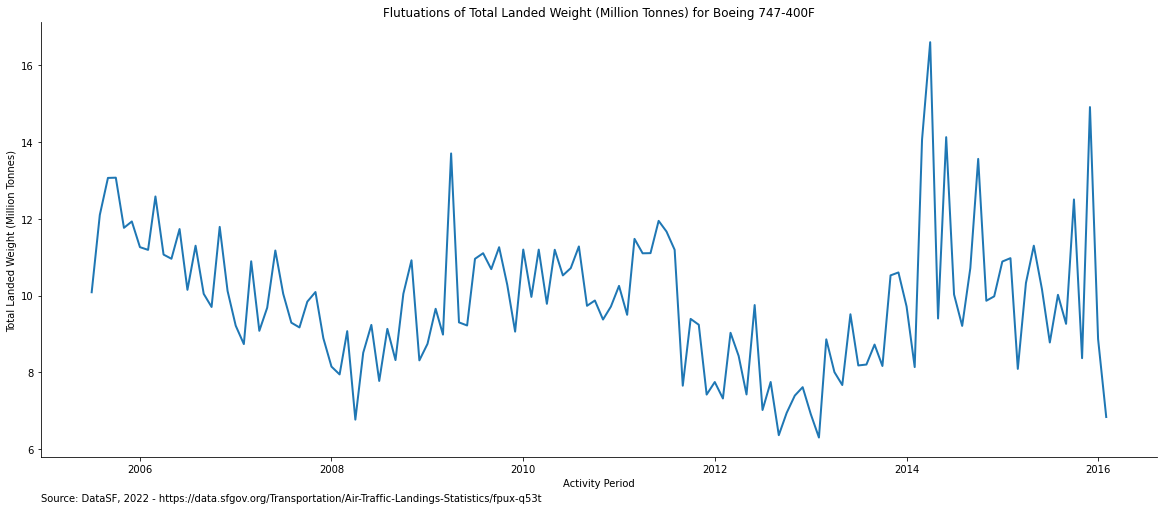

In [41]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)", data = Boeing_747_400F,
             ci = None, palette = "YlGnBu_r", lw=2)


#modified graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Flutuations of Total Landed Weight (Million Tonnes) for Boeing 747-400F")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

Whilst Boeing remains still a major supplier of wide body planes, since 2016, the B744 has been the preferred model for cargo flights. Version data is alas not available for this model. However based on total landed weight, the B772 have been gaining in prominence. 

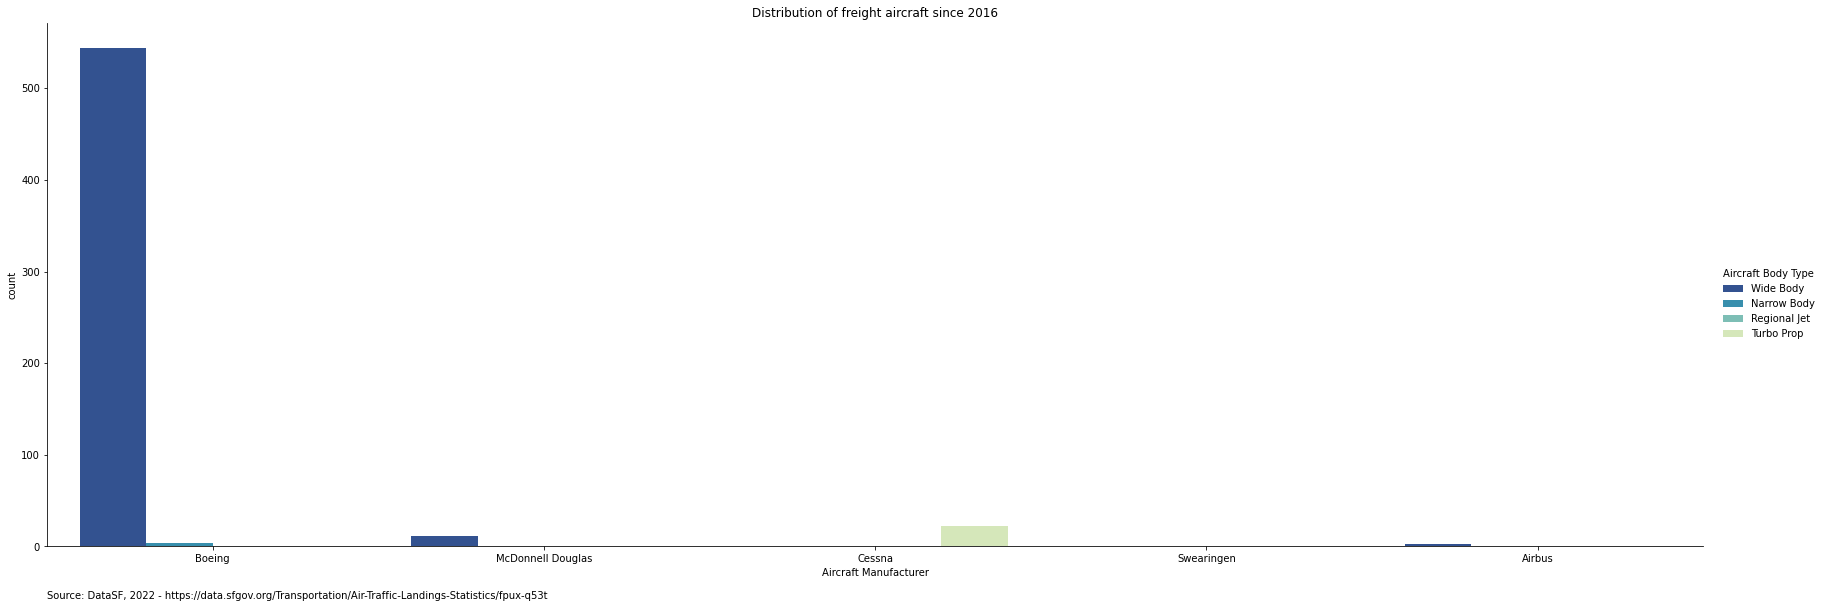

In [42]:
Freighter_2016 = Freighter[Freighter["Year"]>2016]

#create graph
sns.catplot(x ="Aircraft Manufacturer", hue="Aircraft Body Type",data = Freighter_2016, kind = "count", hue_order = ["Wide Body", "Narrow Body", "Regional Jet", "Turbo Prop"],
            height = 8, aspect=3, palette = "YlGnBu_r");

#modify graph
plt.title("Distribution of freight aircraft since 2016")
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

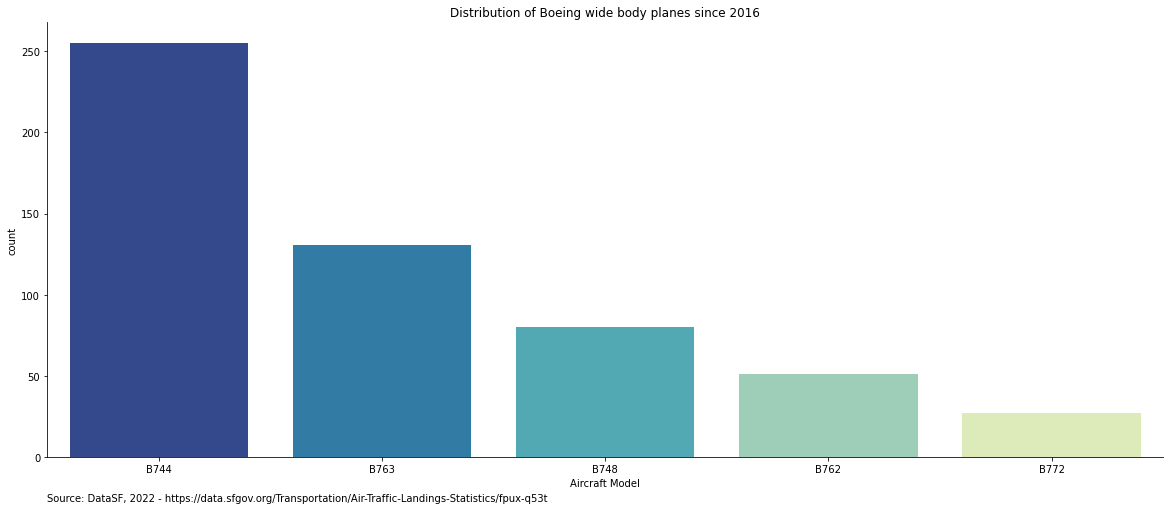

In [43]:
Freight_Boeing_Wide_2016 = Freighter_2016[(Freighter_2016["Aircraft Manufacturer"]=="Boeing")& (Freighter_2016["Aircraft Body Type"]=="Wide Body")]

#create graph
plt.figure(figsize = (20,8))

sns.countplot(x = "Aircraft Model", data = Freight_Boeing_Wide_2016, order =Freight_Boeing_Wide_2016["Aircraft Model"].value_counts().index, 
             palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of Boeing wide body planes since 2016")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In [44]:
Freight_Boeing_Wide_2016[Freight_Boeing_Wide_2016["Aircraft Model"]=="B744"]["Aircraft Version"].unique()

array([nan], dtype=object)

Following is the fluctuations in Boeing's wide body aircraft since 2016. 

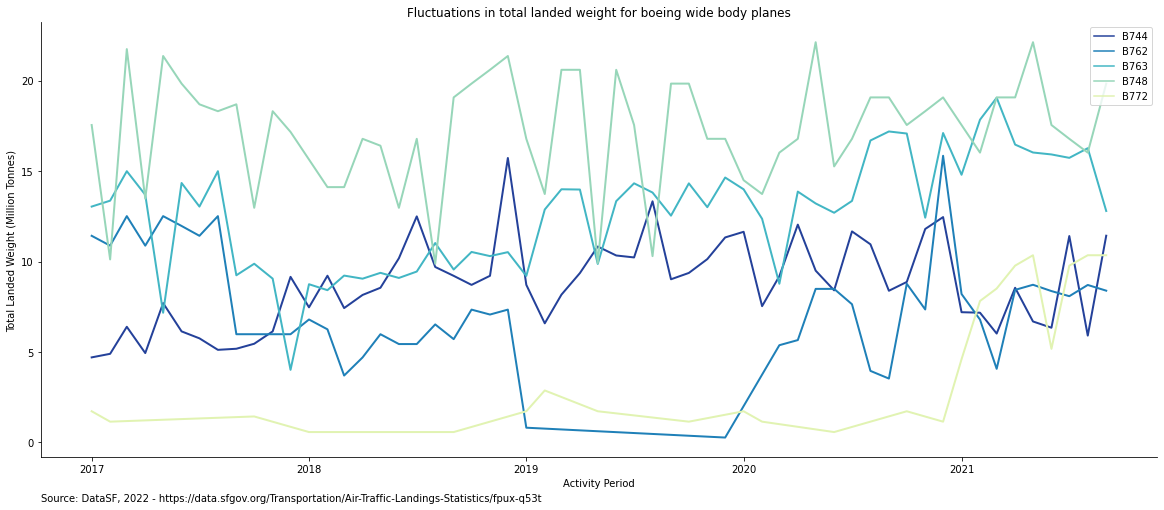

In [45]:
#create graph
plt.figure(figsize = (20,8))
sns.lineplot(x = "Activity Period", y = "Total Landed Weight (Million Tonnes)",
             hue = "Aircraft Model", data = Freight_Boeing_Wide_2016 , ci = None, palette = "YlGnBu_r", lw=2)

#modify graph
plt.legend(loc='upper right')
plt.title("Fluctuations in total landed weight for boeing wide body planes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

# Conclusion
It should be stated that the observations made in this project are focused on SFO. Therefore, some of the observations made may differ from airport to airport. That being said, based on this dataset, it is apparent that Airbus dominate the aircraft servicing commercial flights with their A320 and A321. On the other hand, Boeing is a market leader for wide body plans and dominate the cargo flights.  There are also smaller manufactures who operate in the sector, however their roles are limited.

COVID a major impact on the aviation sector as travel was put on hold and lockdowns made travel difficult. However, as vaccinations become widely used, the market appear to be recovering. 

# Appendix
Below are a collection of visualisations highlighting the distribution of the data within a given variable. 

In [46]:
df = pd.read_csv("/kaggle/input/sf-air-traffic-landing-statistics/Air_Traffic_Landings_Statistics.csv")
df["Aircraft Version"].replace('-', np.nan, inplace = True)
df.drop(["Operating Airline IATA Code", "Published Airline IATA Code"], axis = 1, inplace = True)

In [47]:
df["Activity Period"] = pd.to_datetime(df["Activity Period"], format ="%Y%m")

df["Year"] = df["Activity Period"].dt.year
df["Month"] = df["Activity Period"].dt.month

In [48]:
df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Landing Aircraft Type,Aircraft Body Type,Aircraft Manufacturer,Aircraft Model,Aircraft Version,Landing Count,Total Landed Weight,Year,Month
0,2005-07-01,ABX Air,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,30,40,4066000,2005,7
1,2005-07-01,ABX Air,ABX Air,Domestic,US,Freighter,Narrow Body,McDonnell Douglas,DC-9,41,1,102000,2005,7
2,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,200,2,396000,2005,7
3,2005-07-01,ATA Airlines,ATA Airlines,Domestic,US,Passenger,Narrow Body,Boeing,757,300,167,37408000,2005,7
4,2005-07-01,Air Canada,Air Canada,International,Canada,Passenger,Wide Body,Boeing,767,333,1,320000,2005,7


The data for 2005 is limited and appear not to include a data for a full 12 month period. the number of flights recorded in this dataset typically ranges from 1500 to 2000 for a given year but from 2020 the number full to approx. 1250. 

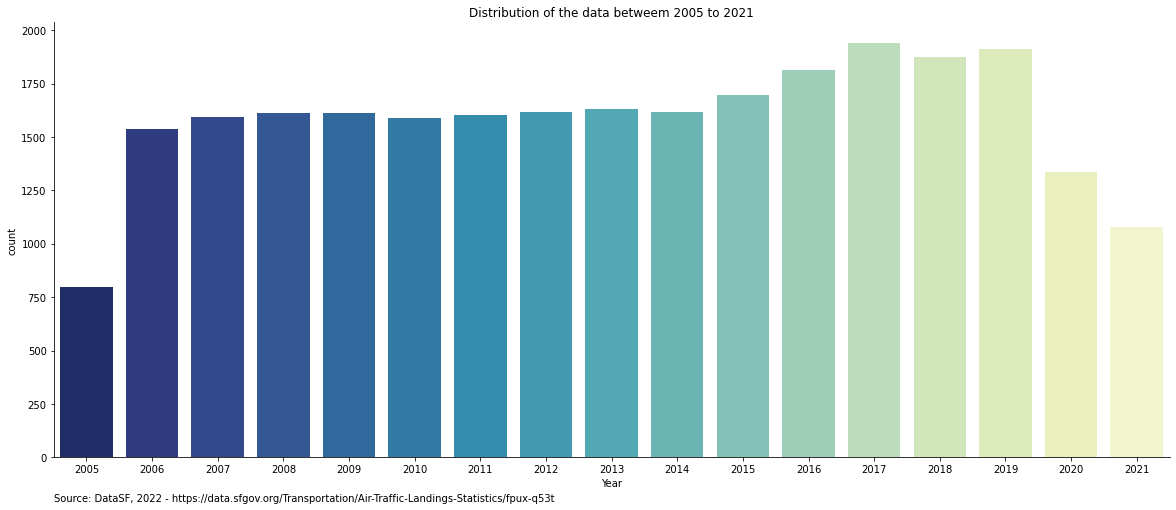

In [49]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Year", data = df, palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of the data betweem 2005 to 2021")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

Whilst a overview suggest that the operating and published airlines are similar, for approx. 7.8% of the data, they differ. The cause of this difference is likely to be due to code sharing(Smithson, 2019).

It should be noted that there is a questionable entry for some domestic flights. Although referred to as domestic,  there are some entries where the GEO region is listed as being Europe and international flights with a GEO region of US. For the purpose of this project, however, this is not likely to cause issues as GEO summary is not a point of interest. 

In [50]:
df["Operating Airline"].value_counts()

United Airlines                     3773
United Airlines - Pre 07/01/2013    1834
Alaska Airlines                     1613
Delta Air Lines                     1599
SkyWest Airlines                    1499
                                    ... 
Trego Dugan Aviation                   2
Pacific Aviation                       2
Boeing Company                         1
E.A.G.L.E.                             1
Xtra Airways                           1
Name: Operating Airline, Length: 115, dtype: int64

In [51]:
df["Published Airline"].value_counts()

United Airlines                     4348
United Airlines - Pre 07/01/2013    2274
Delta Air Lines                     2148
Alaska Airlines                     1838
American Airlines                   1198
                                    ... 
Pacific Aviation                       2
Focus Air                              2
E.A.G.L.E.                             1
Boeing Company                         1
Xtra Airways                           1
Name: Published Airline, Length: 105, dtype: int64

In [52]:
print(round((sum(df["Published Airline"]!=df["Operating Airline"])/df.shape[0])*100,2), "% of the data has differing published and operating airlines")

7.76 % of the data has differing published and operating airlines


Whilst a overview suggest that the operating and published airlines are similar, for approx. 7.8% of the data, they differ. The cause of this difference is likely to be due to code sharing ([Smithson, 2019](https://thepointsguy.com/guide/what-are-codeshare-flights-and-how-do-they-work/)).

It should be noted that there is a questionable entry for some domestic flights. Although referred to as domestic,  there are some entries where the GEO region is listed as being Europe and international flights with a GEO region of US. For the purpose of this project, however, this is not likely to cause issues as GEO summary is not a point of interest. 

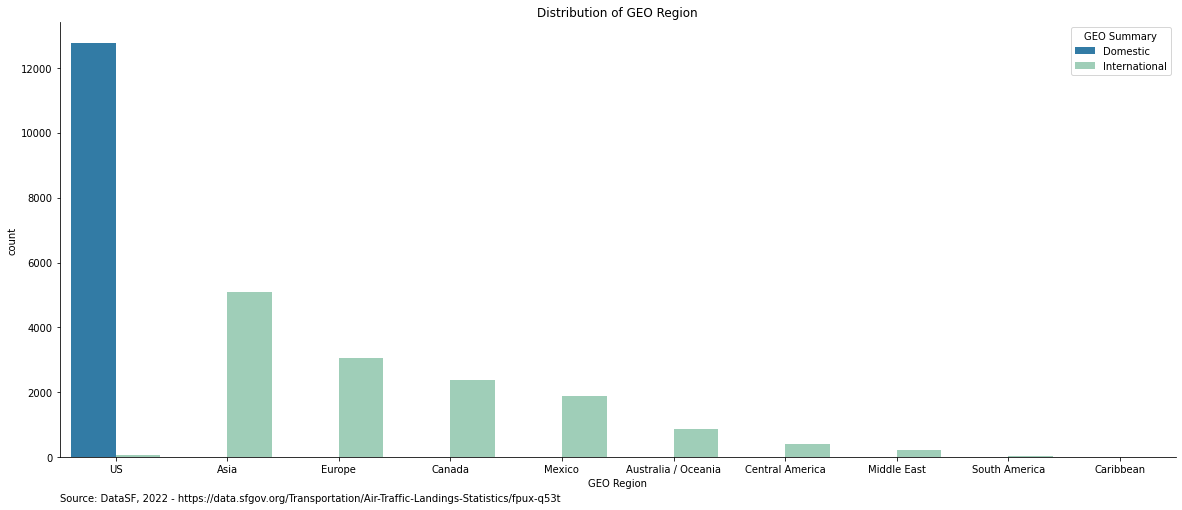

In [53]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region", hue ="GEO Summary", data = df , palette = "YlGnBu_r", order = df["GEO Region"].value_counts().index)

#modify graph
plt.title("Distribution of GEO Region")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

In [54]:
df[df["GEO Summary"]=="Domestic"]["GEO Region"].value_counts().reset_index(name = "count").set_index("index")

,count
index,
US,12760
Europe,25


Overall, US is a key GEO region in this data followed by Asia. This is a key feature of SFO. Other airports such as those based in Europe and Asia will have different results. 

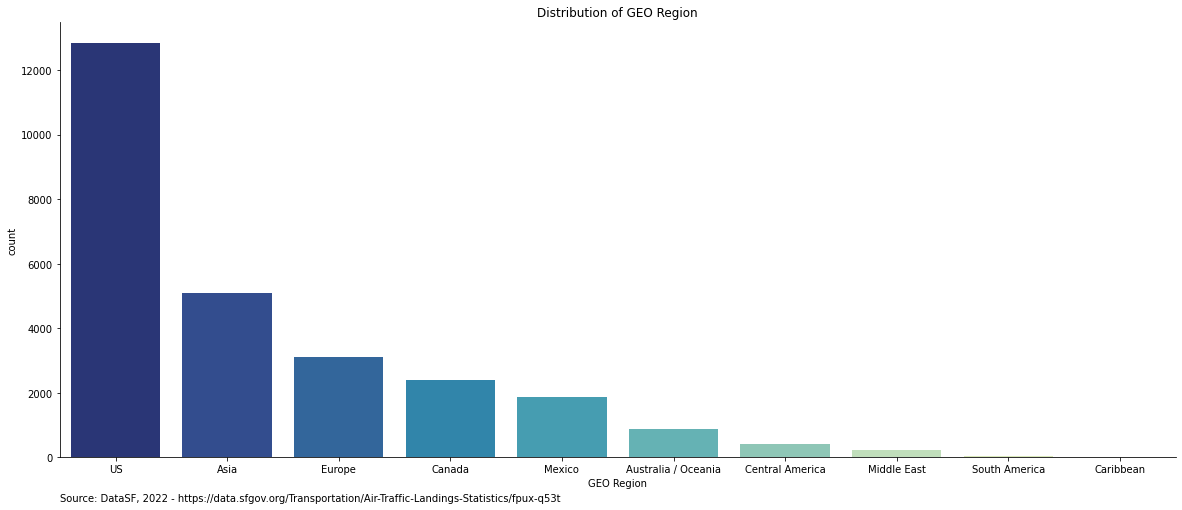

In [55]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "GEO Region", data = df, palette = "YlGnBu_r", order = df["GEO Region"].value_counts().index)

#modify graph
plt.title("Distribution of GEO Region")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

As one may expect, Boeing and Airbus are the main plays in the aircraft manufacturing. After these two players there is a drop before Bombardier. Aircraft model and versions vary significantly and can only be understood in the context of the respective manufacture. 

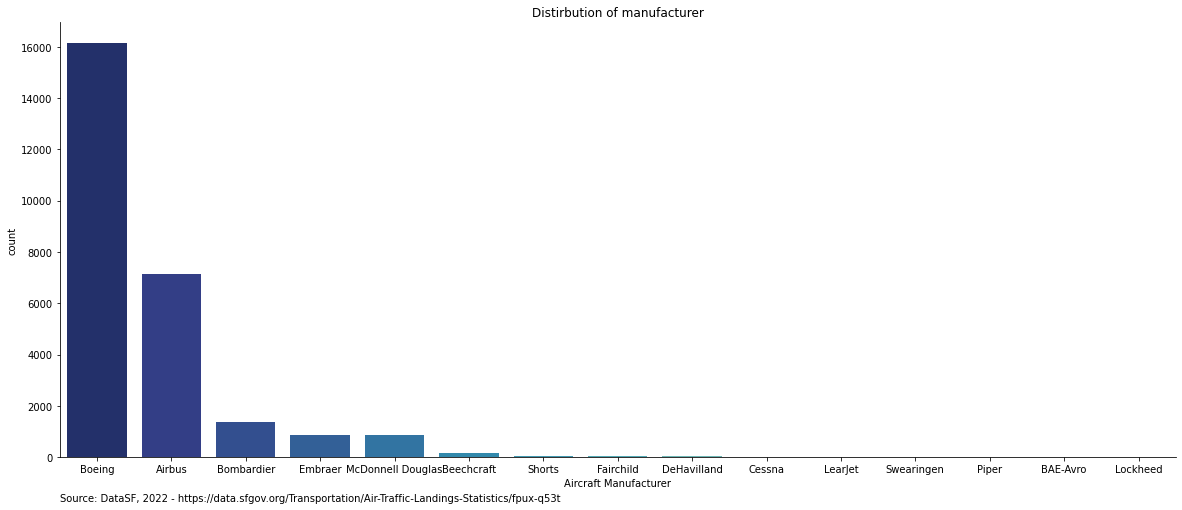

In [56]:
#create graph
plt.figure(figsize = (20,8))
sns.countplot(x = "Aircraft Manufacturer", data = df, palette = "YlGnBu_r", order = df["Aircraft Manufacturer"].value_counts().index)

#modify graph
plt.title("Distirbution of manufacturer")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

Alas, further domain knowledge is required to fully understanding the Landing Count variable. However, it appears that the data has a strong skew to the right and a broad range. 

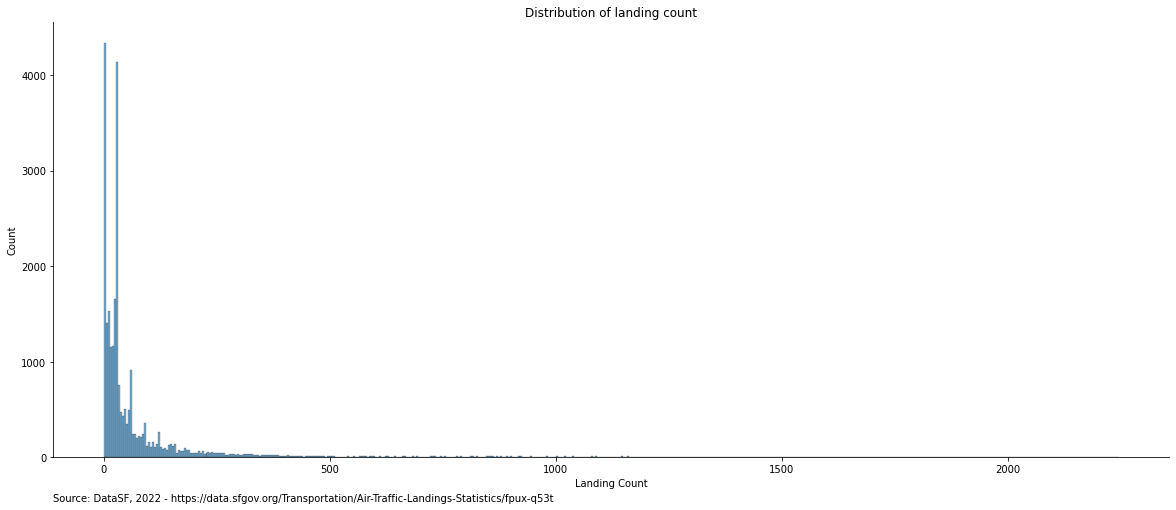

In [57]:
#create graph
plt.figure(figsize = (20,8))
sns.histplot(x = "Landing Count", data = df, palette = "YlGnBu_r", alpha = 0.6)

#modify graph
plt.title("Distribution of landing count")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Total landed weight also has a similar distribution of as landing count with a skew to the right and a broad range of values. The range appears to be particularly broad for domestic flights. 

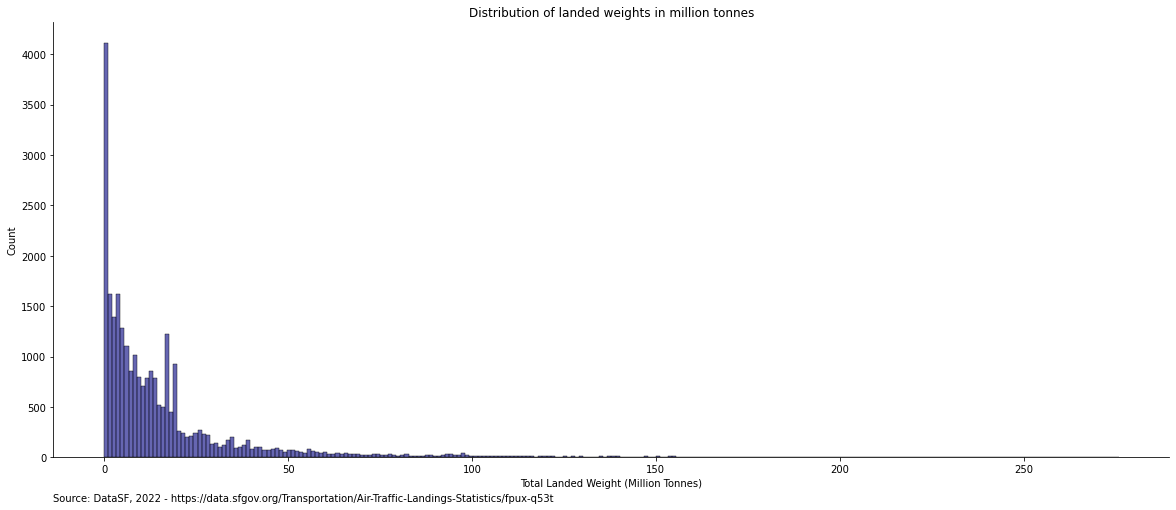

In [58]:
df["Total Landed Weight (Million Tonnes)"] = df["Total Landed Weight"]/1000000

#create graph
plt.figure(figsize = (20,8))
sns.histplot(x = "Total Landed Weight (Million Tonnes)", data = df, color = "navy", alpha = 0.6, palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of landed weights in million tonnes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )
plt.show()

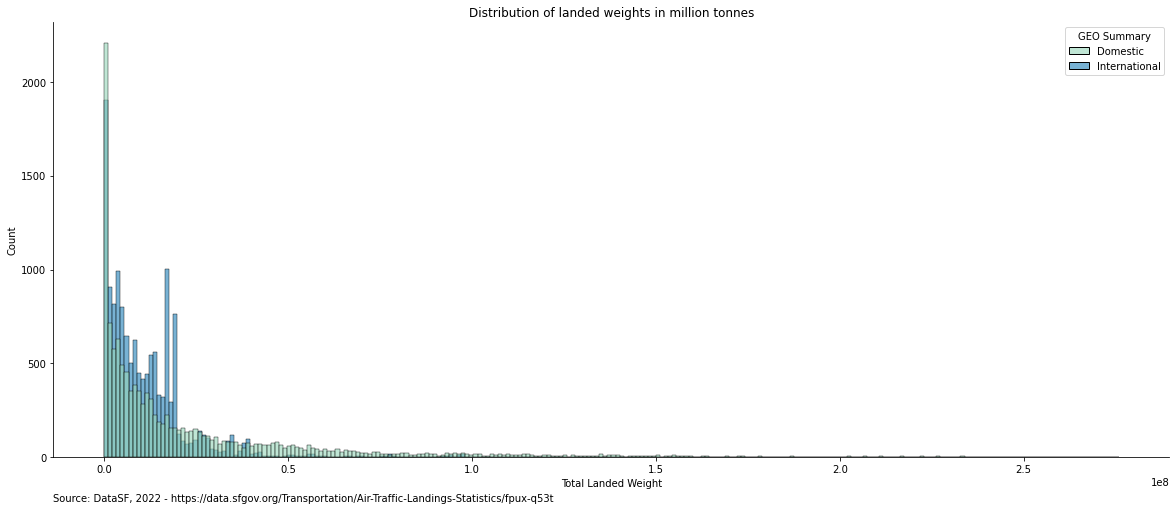

In [59]:
#create graph
plt.figure(figsize = (20,8))
sns.histplot(x = "Total Landed Weight", data = df, alpha = 0.6, hue = "GEO Summary", palette = "YlGnBu")

#modify graph
plt.title("Distribution of landed weights in million tonnes")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Given that these two variables are the only numerical data in this dataset, the interaction between the two variables may reveal some insights. It appears that the values radiate from the origin and fan out in a liner manner at differing angles. However, adding GEO summary or Aircraft type both fail to account for this pattern of distribution.

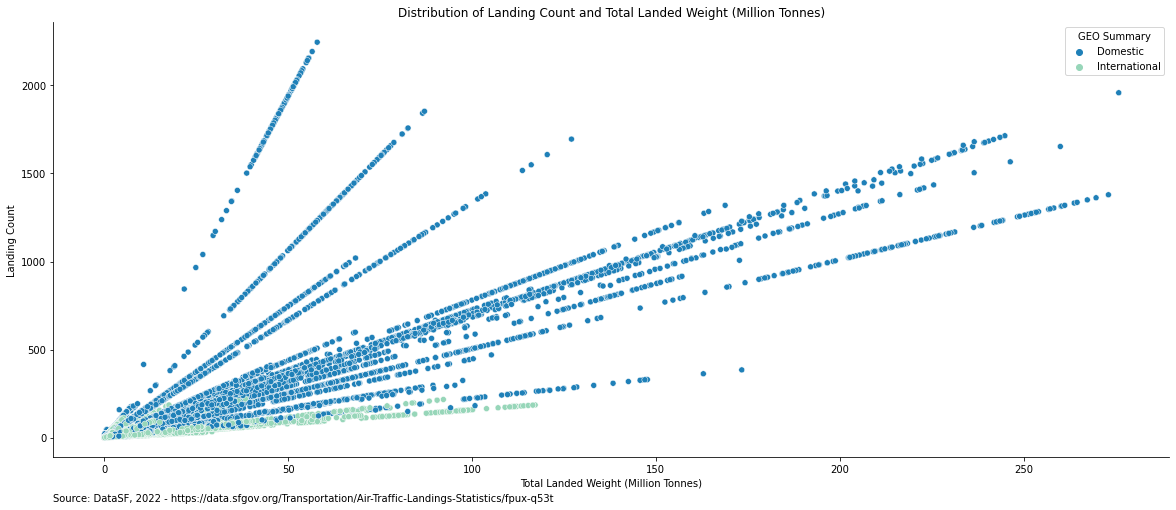

In [60]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "Total Landed Weight (Million Tonnes)",y ="Landing Count", data = df, hue ="GEO Summary", palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of Landing Count and Total Landed Weight (Million Tonnes)")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

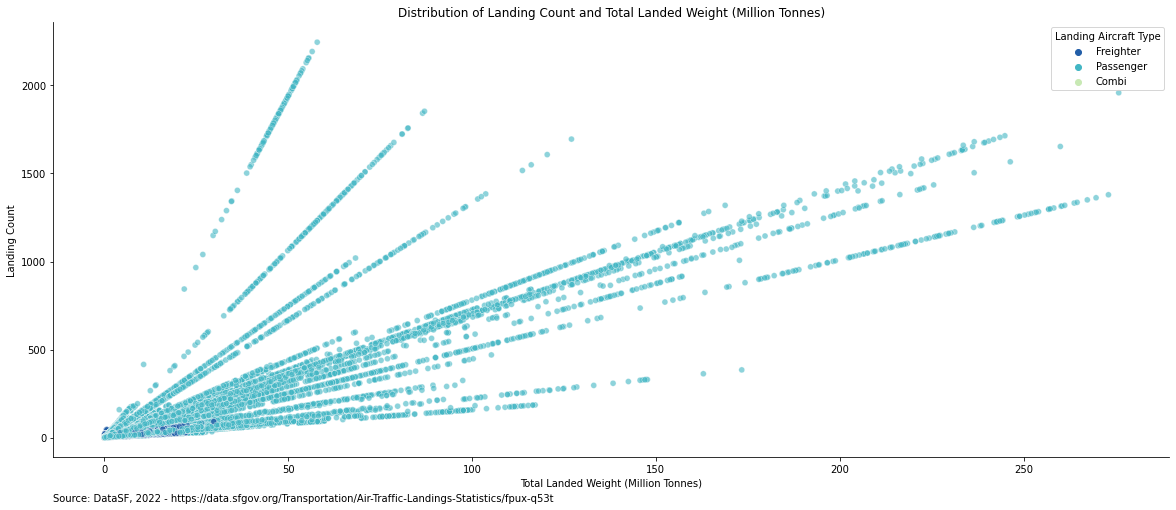

In [61]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "Total Landed Weight (Million Tonnes)",y ="Landing Count", 
                data = df, hue ="Landing Aircraft Type", palette = "YlGnBu_r", alpha = 0.6)

#modify graph
plt.title("Distribution of Landing Count and Total Landed Weight (Million Tonnes)")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

Conducting a K-Mean's cluster analyses on the scaled version of total landed weights and landing count, reveals there may be 3 -6 clusters in the data. Examining both 3 and 6 clusters reveals that the clusters are these clusters form in expanding bands from the centre. However, without further domain knowledge, understanding these patterns and clusters. 

In [62]:
# import library for clustering
from sklearn.cluster import KMeans

# library for scaling data
from sklearn import preprocessing 

Weight_landing = df[["Total Landed Weight (Million Tonnes)","Landing Count"]].copy()
Weight_landing_scaled = preprocessing.scale(Weight_landing)

In [63]:
# calculate wcss

wcss = []

for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(Weight_landing_scaled)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

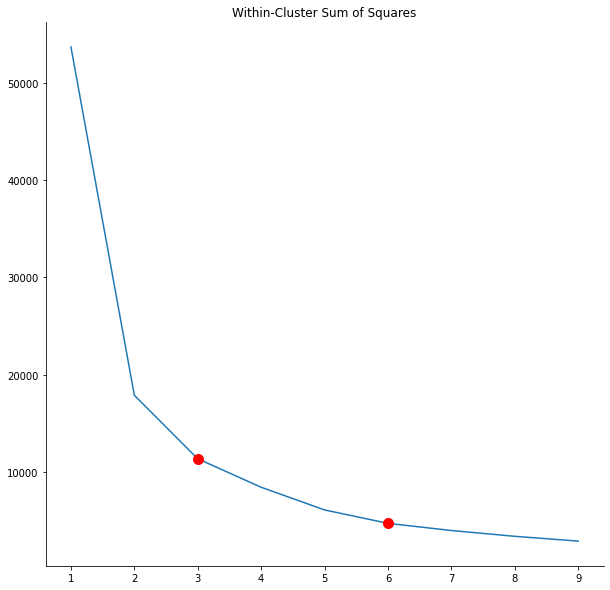

In [64]:
# plot results of wcss
plt.figure(figsize = (10,10))
number_clusters = range (1,10)
plt.plot(number_clusters,wcss)

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Within-Cluster Sum of Squares")

plt.plot((3), (wcss[2]), 'o', color='r',ms = 10)
plt.plot((6), (wcss[5]), 'o', color='r', ms = 10)
plt.show()

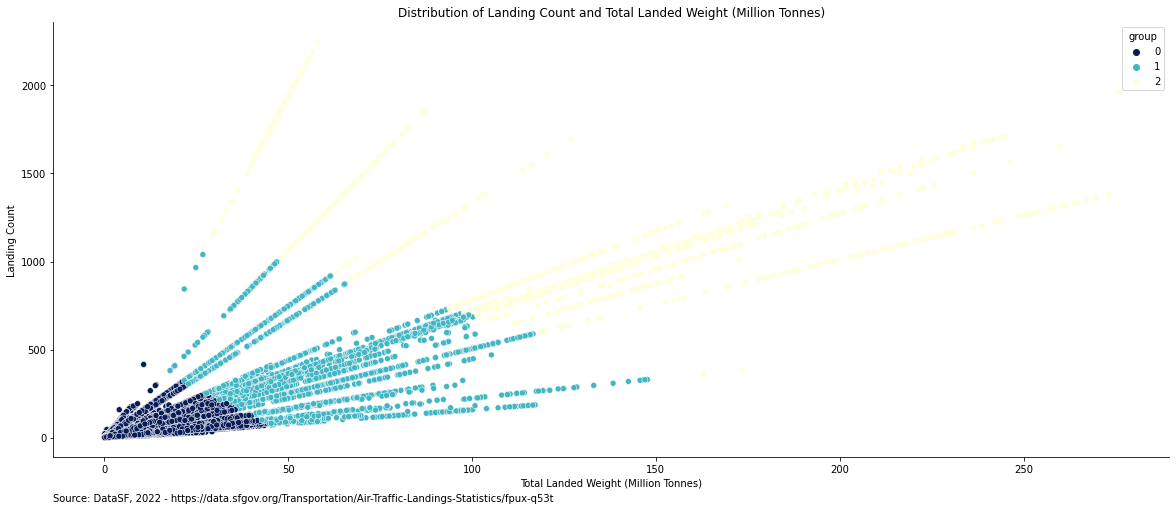

In [65]:
# calculate 3 clusters 
kmeans_3 = KMeans(3)
kmeans_3.fit(Weight_landing_scaled)
cluster_3 = Weight_landing.copy()
cluster_3["group"]= kmeans_3.predict(Weight_landing_scaled)

# create graph
plt.figure(figsize = (20,8))
sns.scatterplot(x = "Total Landed Weight (Million Tonnes)",y ="Landing Count",
                data = cluster_3, hue = "group", palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of Landing Count and Total Landed Weight (Million Tonnes)")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()

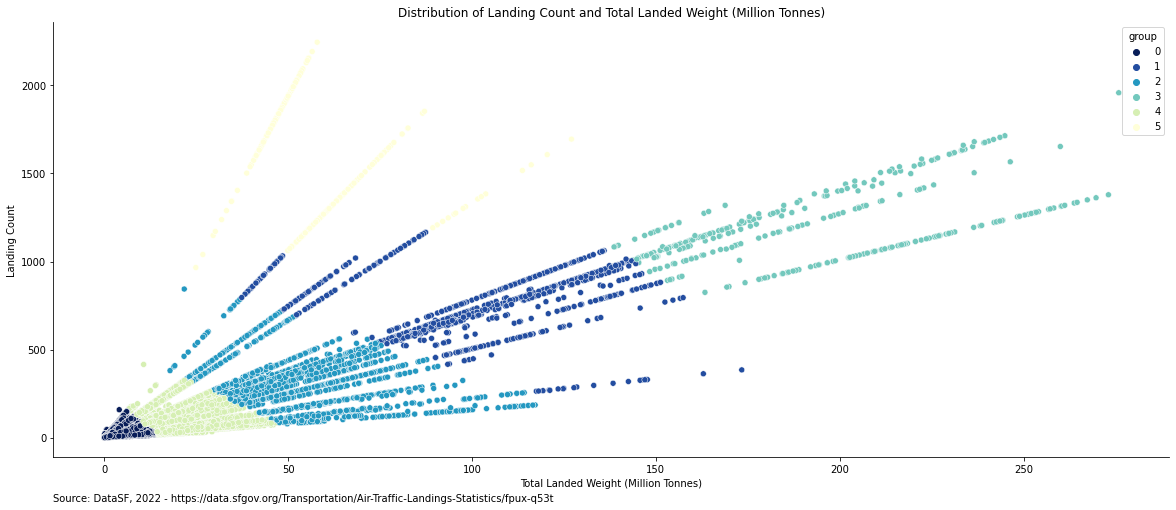

In [66]:
# calculate 6 clusters 
kmeans_6 = KMeans(6)
kmeans_6.fit(Weight_landing_scaled)
cluster_6 = Weight_landing.copy()
cluster_6["group"]= kmeans_6.predict(Weight_landing_scaled)

plt.figure(figsize = (20,8))
sns.scatterplot(x = "Total Landed Weight (Million Tonnes)",y ="Landing Count", 
                data = cluster_6, hue = "group", palette = "YlGnBu_r")

#modify graph
plt.title("Distribution of Landing Count and Total Landed Weight (Million Tonnes)")

sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: DataSF, 2022 - https://data.sfgov.org/Transportation/Air-Traffic-Landings-Statistics/fpux-q53t', (0,-.1), xycoords ='axes fraction' )

plt.show()